In [2]:
%reload_ext autoreload
%autoreload 2

In [2]:
# default_exp eda

# 诈骗电话识别
http://www.scdata.net.cn/common/cmpt/%E8%AF%88%E9%AA%97%E7%94%B5%E8%AF%9D%E8%AF%86%E5%88%AB_%E7%AB%9E%E8%B5%9B%E4%BF%A1%E6%81%AF.html

近年来，通过
* 拨打电话、
* 群发短信

实施诈骗的违法行为一直困扰着手机用户，给移动手机用户造成了困扰甚至金钱的损失，如何有效防护诈骗电话对用户隐私、财产造成的威胁，成为公安急需解决的问题，也是四川移动提升用户满意度、保护用户权益需要高度关注的问题。

通过诈骗电话号码的通信行为，识别诈骗电话，及时关停诈骗号码，成为运营商与公安部门合作的持续的工作，虽取得一定成绩，但诈骗方式的不断翻新，给诈骗电话的准确识别带来了持续算法挑战。

## Prizes
一等奖（1名）：奖金5万元人民币+价值20万元云资源+价值20万元孵化办公空间资源 

二等奖（1名）：奖金3万元人民币+价值15万元云资源+价值15万元孵化办公空间资源  

三等奖（1名）：奖金1万元人民币+价值10万元云资源+价值15万元孵化办公空间资源 

优秀奖（2名）：奖金0.5万元人民币

说明：以上奖金均为税前金额。


## Timeline
1. 初赛：

2020年05月26日--07月10日        大赛报名，初赛作品提交

2020年07月11日--07月15日        初赛评审，公布入围复赛名单  

说明：初赛综合评审前200名团队进入复赛，初赛将采用视频会议的形式对排行榜前20名团队进行资格审核，审核材料包含但不限于：源代码、算法模型、算法说明书等。

2. 复赛：

2020年07月16日--08月15日        复赛启动，复赛作品提交

2020年08月16日--08月20日        复赛评审，公布入围决赛名单 

说明：复赛综合评审前5名团队进入决赛，复赛将采用视频会议的形式对排行榜前5名团队进行资格审核，审核材料包含但不限于：源代码、算法模型、算法说明书等。

3. 决赛：

2020年08月21日--09月20日        专家指导，决赛作品提交

2020年09月22日                          决赛现场答辩、评审

（以上时间若有变动，以官方最新公布为准。）

## 任务

基于用户通信行为数据的诈骗电话识别，将针对诈骗电话与正常用户在语音、短信、上网行为数据的差异，构建诈骗电话识别算法，快速准确识别出诈骗电话，供公安部门与运营商及时关停诈骗号源，打击诈骗犯罪行为。选手需自行分析脱敏样本数据，找出规律，构建识别算法。
      
## 数据
*注 : 报名参赛或加入队伍后，可获取数据下载权限。

大赛可用数据仅限于大赛组委会提供的数据；使用外部数据视为作弊

数据按时间划分为训练集和测试集。

初赛阶段：预测2020年4月的数据；

复赛阶段：预测2020年5月的数据；

决赛阶段：预测2020年6月的数据

数据字段描述如下：

    注1：初赛的测试集中，不存在arpu_201908、arpu_201909……arpu_202003等字段，取而代之的是arpu_202004这1个字段。
    
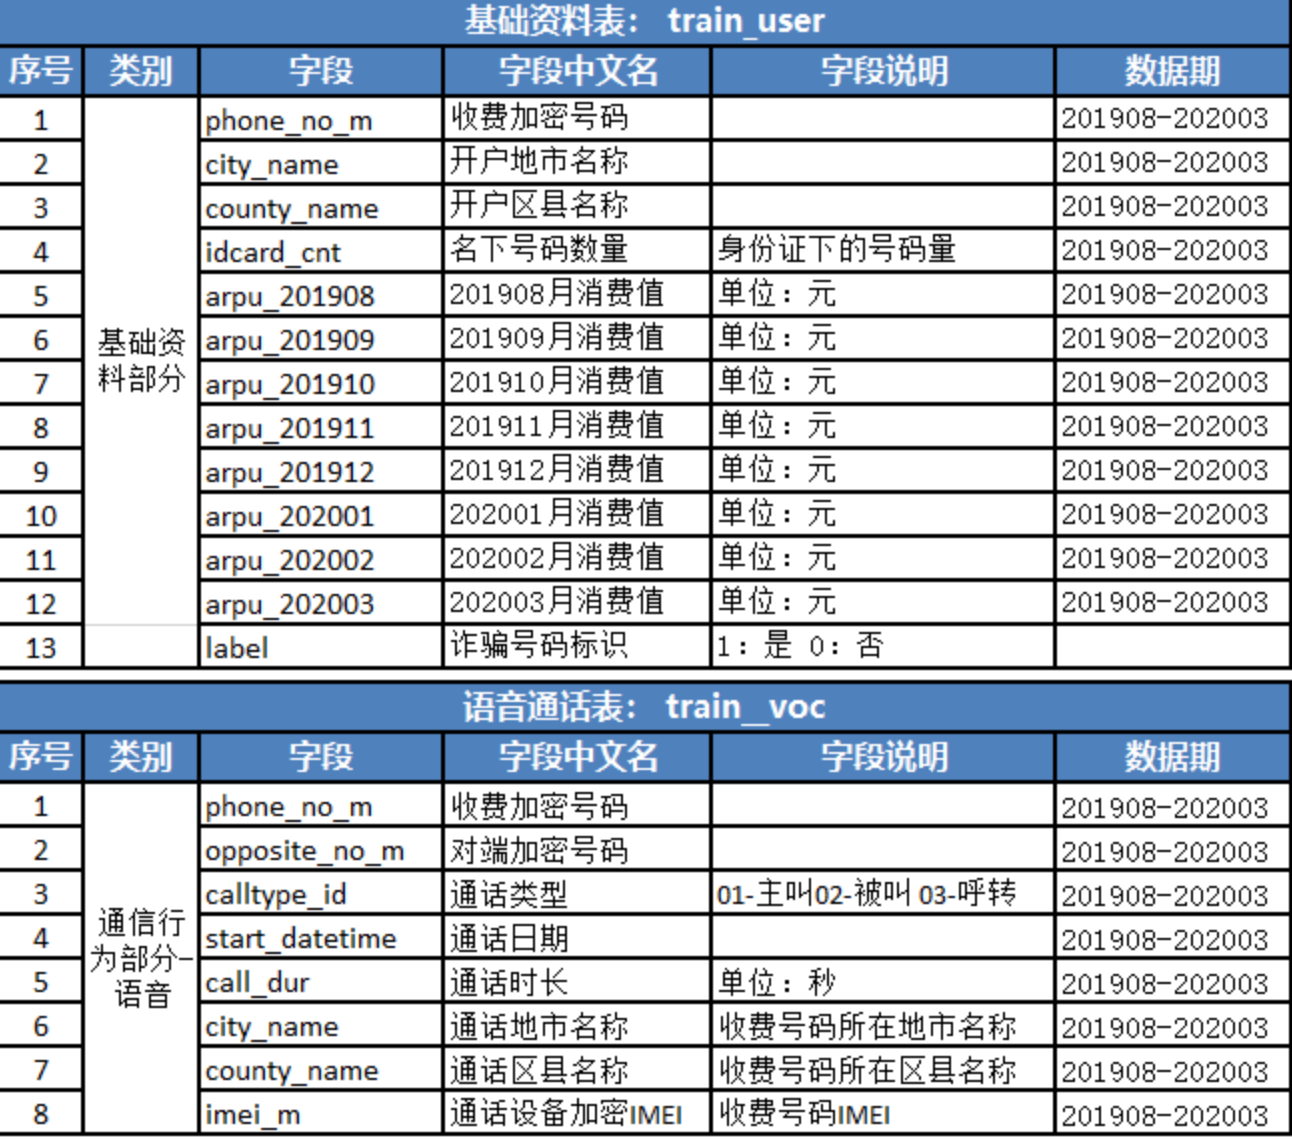

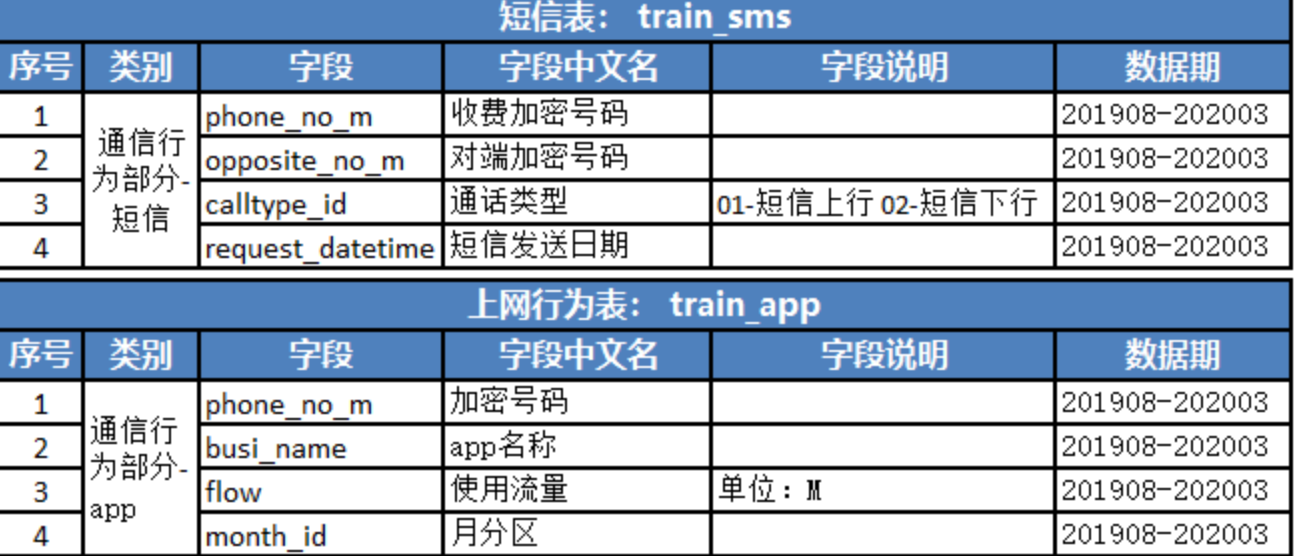

## evaluate

比赛采用标准的macro F1，采用A/B榜（提取码：bd6m），A:B=4:6。

In [1]:
from sklearn.metrics import f1_score
y_true = [1, 0, 1, 0]
y_pred = [1, 1, 1, 0]
score = f1_score(y_true, y_pred, average='macro')
score

0.7333333333333334

# 思路

简单点看，就是个略不平衡的2分类

## 思路1: 统计特征 压到 user层，然后GBDT
统计特征

行为轨迹

### FE的注意点
* train和test的user是不重叠的
* train中提供了8个月的话费、voc、sms、app数据，而test中只提供了预测月的话费、voc、sms、app数据，这就决定了粒度只能在user month这个粒度下进行

## 思路2: DL
数据量有点少，放弃

# lib导入

In [1]:
# export
import os
from code.config import * 
from loguru import logger
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 100)  # 设置显示数据的最大列数，防止出现省略号…，导致数据显示不全
pd.set_option('expand_frame_repr', False)  # 当列太多时不自动换行

In [2]:
import sys
sys.path.append('..')
import seaborn as sns
sns.set(font='Arial Unicode MS')  # 解决Seaborn中文显示问题
from mylib.utils.pickle import PickleWrapper
from mylib.data.processing.eda import describe

In [3]:
args.DATA_DIR

'../../data/contest/20sichuan_fraudtel_detection/'

In [4]:
!ls ../../data/contest/20sichuan_fraudtel_detection/

submit_example.csv test               train


In [5]:
!ls ../../data/contest/20sichuan_fraudtel_detection/train

train_app.csv  train_sms.csv  train_user.csv train_voc.csv


# EDA

## train_user

In [3]:
train_user = pd.read_csv(os.path.join(args.DATA_DIR, 'train/train_user.csv'))

train_user.head()

,phone_no_m,city_name,county_name,idcard_cnt,arpu_201908,arpu_201909,arpu_201910,arpu_201911,arpu_201912,arpu_202001,arpu_202002,arpu_202003,label
0,672ddbf02a5544d32e4ecc9433b1981bffe23bf912273a...,绵阳,江油分公司,1,46.06,45.00,45.0,45.00,45.00,45.0,45.0,45.0,0
1,5e1272273e041e82cb275ae877710be98cdaf5b0a8f34d...,德阳,旌阳分公司,1,79.00,79.20,79.1,79.30,41.40,34.1,59.4,60.0,0
2,eaab3472ec87b076e69e6e8bb62b14341638fc63661a6c...,成都,金堂分公司,2,18.85,24.45,22.0,21.40,22.15,21.1,61.3,63.0,0
3,0ce1bb415704178bf44e9c9b431a39b083a132c8e6d99f...,成都,高新分公司,2,19.20,29.65,130.4,173.12,19.00,19.0,19.0,23.2,0
4,28b87f35f63f65096a53e3a4c97eaffd4a6c43ffa7e92d...,德阳,旌阳分公司,1,50.00,50.00,50.0,50.00,50.00,50.0,50.0,50.0,0


### city_name county_name多对多关系

In [57]:
train_user['city_name county_name'.split()].drop_duplicates().sort_values('county_name')

,city_name,county_name
414,达州,万源市分公司
406,绵阳,三台分公司
343,内江,东兴区分公司
444,攀枝花,东区分公司
352,眉山,东坡区分公司
128,德阳,中江分公司
268,宜宾,临港经济技术开发区分公司
1105,眉山,丹棱分公司
386,资阳,乐至分公司
596,阿坝,九寨沟县分公司


In [139]:
describe(train_user)

num of records: 6106, num of columns: 13


,Data Type,Unique Values,count Missing,% Missing,Mode,Count Mode,% Mode,mean,std,min,25%,50%,75%,max
phone_no_m,object,6106,0,0.00,00073ceecc0f7220a440580ac5dea410c90d14b6669458...,1,0.0163773,NaN,NaN,NaN,NaN,NaN,NaN,NaN
city_name,object,22,289,4.73,成都,2254,36.9145,NaN,NaN,NaN,NaN,NaN,NaN,NaN
county_name,object,181,289,4.73,武侯分公司,262,4.29086,NaN,NaN,NaN,NaN,NaN,NaN,NaN
idcard_cnt,int64,11,0,0.00,1,2785,45.6109,2.0719,1.32916,0,1,2,3,13
arpu_201908,float64,2289,1791,29.33,1,233,3.81592,60.36,62.8388,1,14,41,89,506.58
arpu_201909,float64,2324,1641,26.88,1,279,4.56928,58.7576,63.0471,-49.53,13,39.56,82.92,773.55
arpu_201910,float64,2369,1436,23.52,1,286,4.68392,59.7529,70.5197,1,13.33,39,86.265,1291.06
arpu_201911,float64,2652,1026,16.80,1,272,4.45463,64.6085,87.7698,1,14,41.05,91.1625,1922.63
arpu_201912,float64,2702,854,13.99,1,283,4.63479,70.525,115.395,-54.74,15.075,40,92.0125,1858.98
arpu_202001,float64,2432,957,15.67,19,274,4.48739,59.4902,75.449,1,16.38,39,77,1295.8


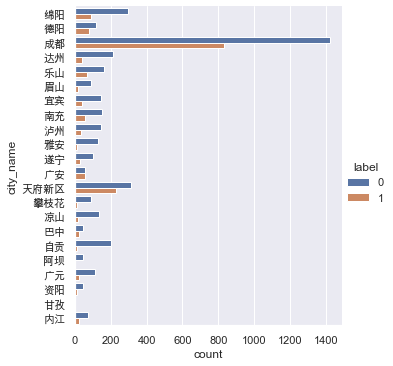

In [143]:
sns.catplot(y='city_name', hue='label', data=train_user, kind='count')

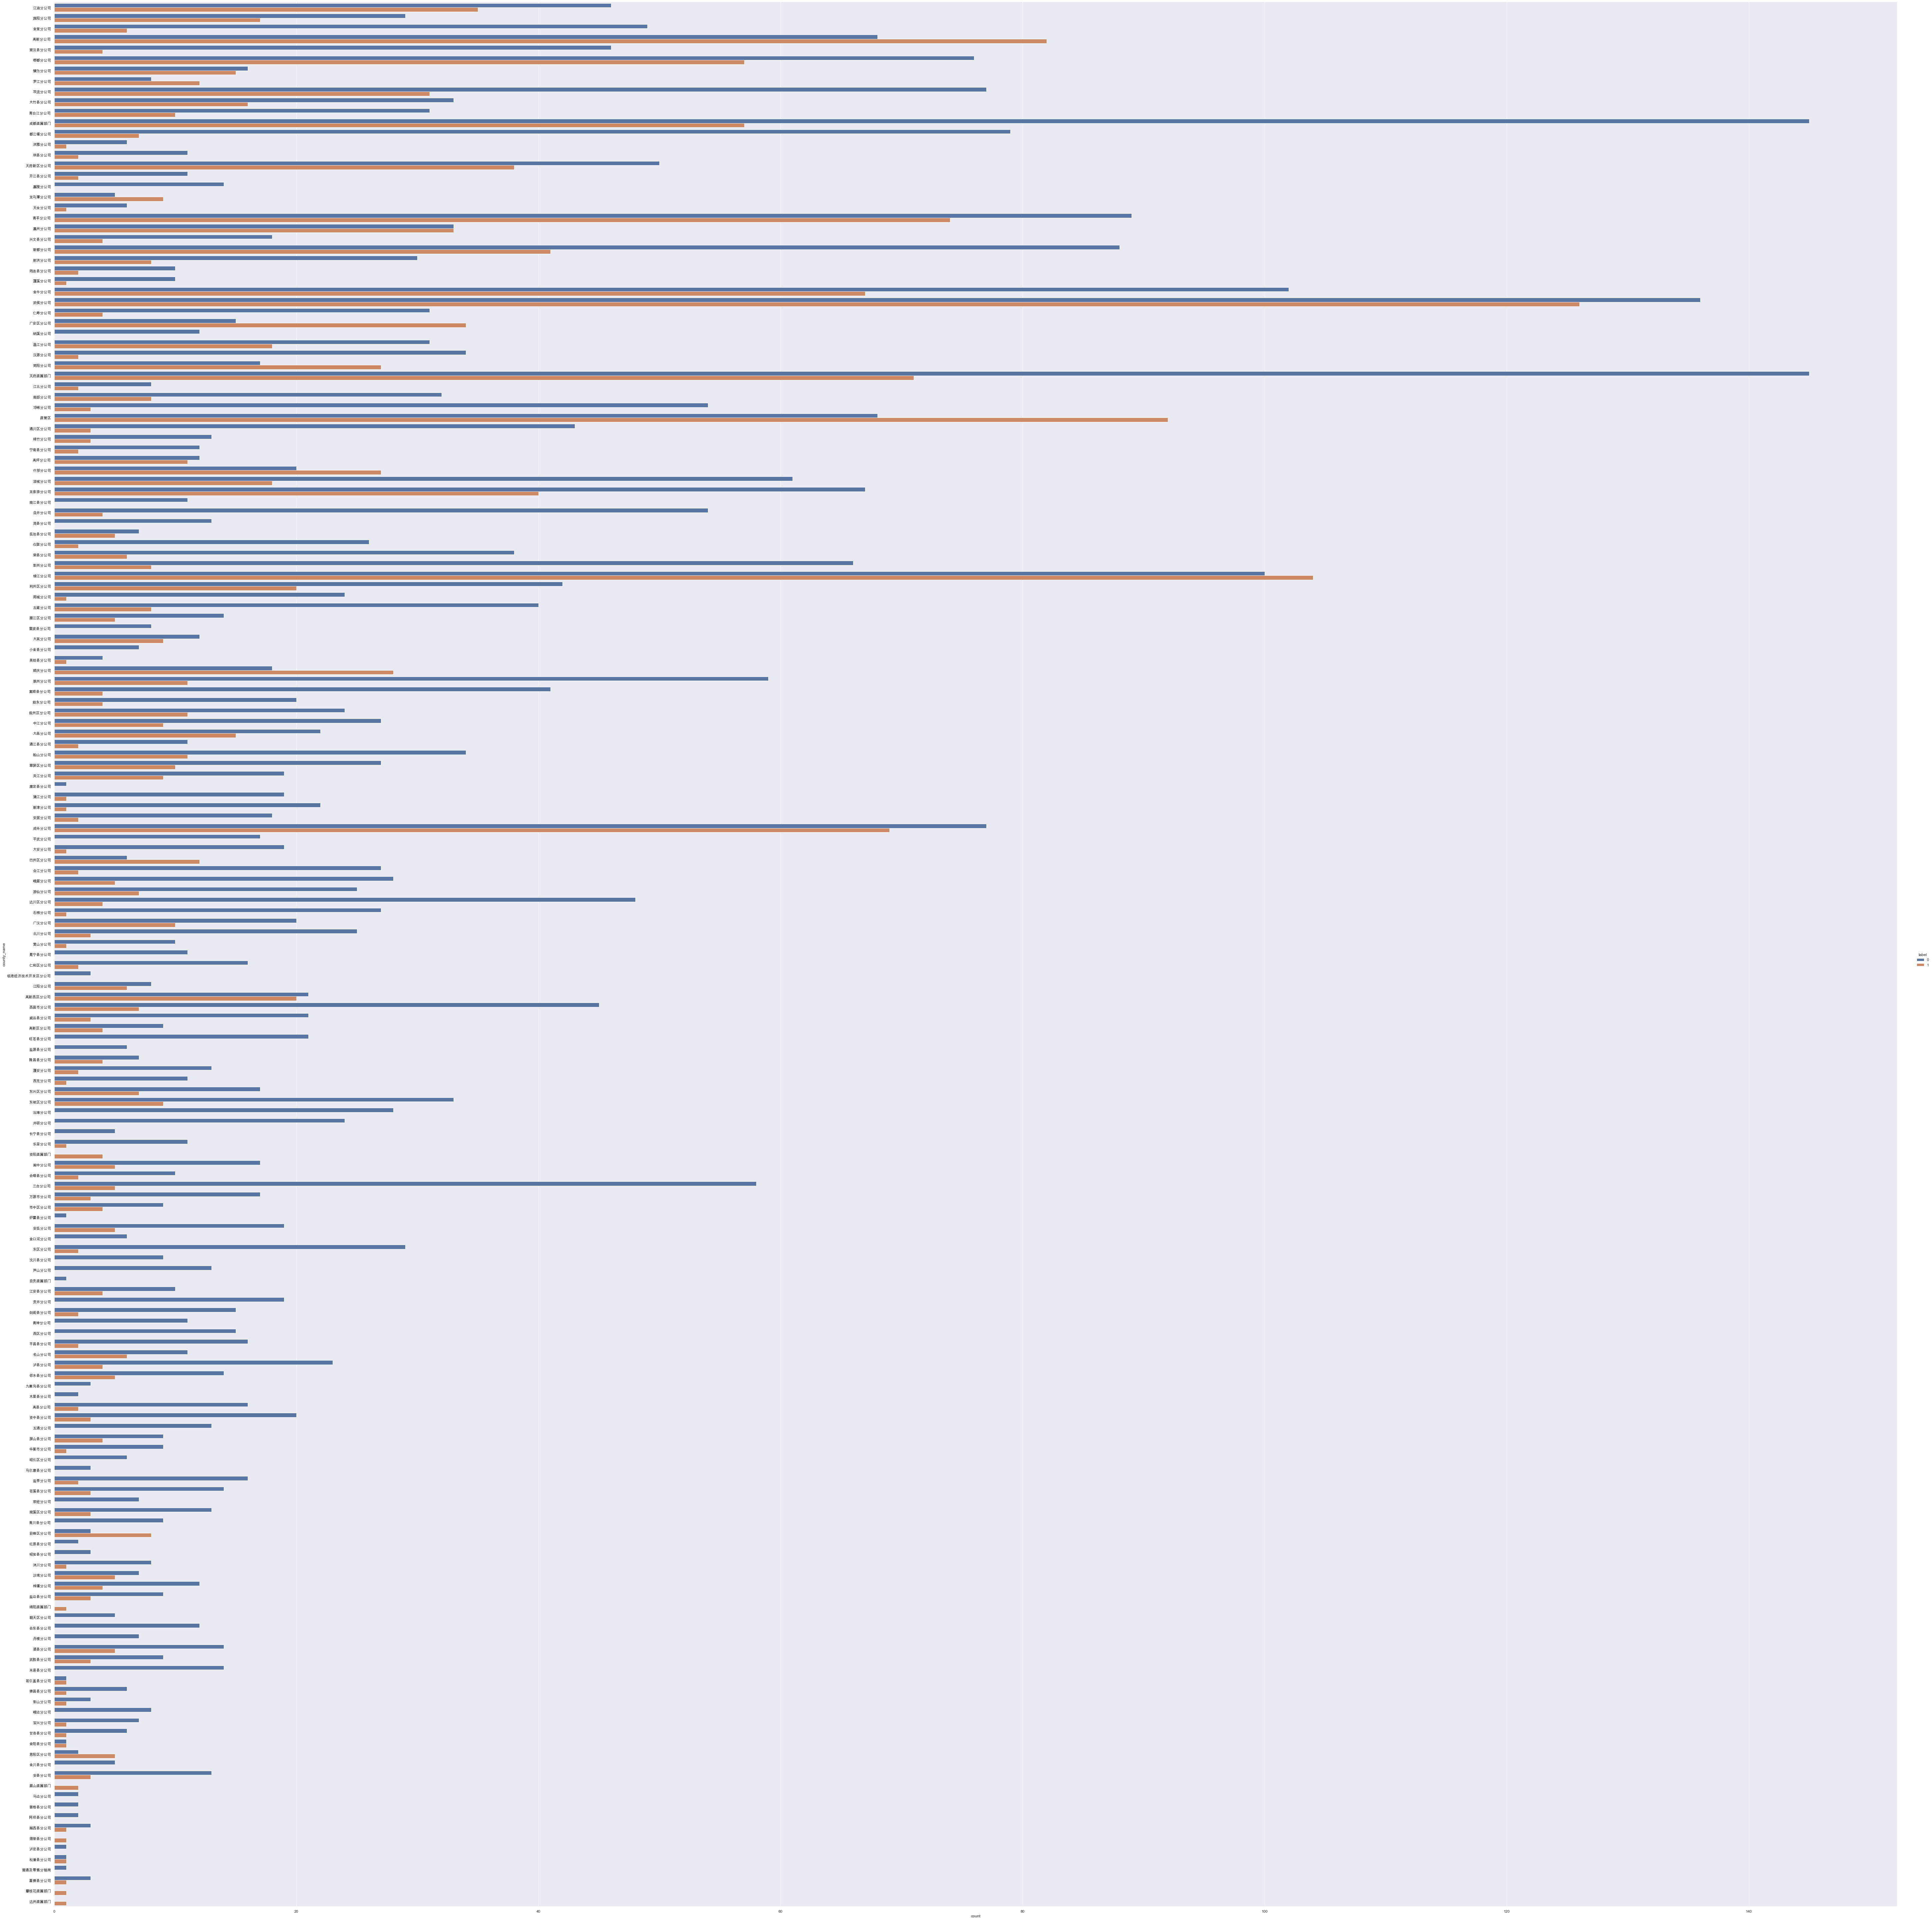

In [147]:
sns.catplot(y='county_name', hue='label', data=train_user, kind='count', height=80)

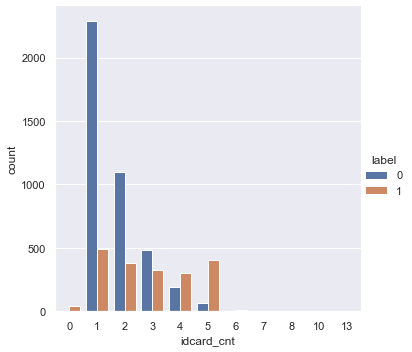

In [140]:
sns.catplot(x='idcard_cnt', hue='label', data=train_user, kind='count')

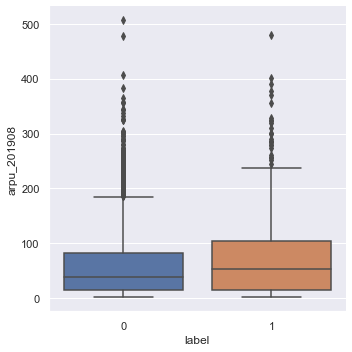

In [148]:
sns.catplot(y='arpu_201908', x='label', data=train_user, kind='box')

In [7]:
train_user.label.value_counts()

0    4144
1    1962
Name: label, dtype: int64

In [5]:
train_user.columns

Index(['phone_no_m', 'city_name', 'county_name', 'idcard_cnt', 'arpu_201908',
       'arpu_201909', 'arpu_201910', 'arpu_201911', 'arpu_201912',
       'arpu_202001', 'arpu_202002', 'arpu_202003', 'label'],
      dtype='object')

## train_voc

In [59]:
train_voc = pd.read_csv(os.path.join(args.DATA_DIR, 'train/train_voc.csv'))

train_voc.head()

/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,phone_no_m,opposite_no_m,calltype_id,start_datetime,call_dur,city_name,county_name,imei_m
0,3b6bef554a4754fa9977b50d99e6777c9fb26e585961a4...,3572f19c52faeea5111ddd79dfc3643171d00e6d8b3fd9...,2,2019-10-17 17:16:25,13,NaN,NaN,d2940d7cde5092d809af2e4bb8f6936a405382bd541542...
1,3b6bef554a4754fa9977b50d99e6777c9fb26e585961a4...,3572f19c52faeea5111ddd79dfc3643171d00e6d8b3fd9...,2,2019-10-17 17:36:20,16,NaN,NaN,d2940d7cde5092d809af2e4bb8f6936a405382bd541542...
2,ecd1b3f5a38576ef9872d1cb7a762f31869153de736e7a...,c386d11d5203136e924e070afcac734cdaea6691472e84...,1,2019-08-28 09:46:50,18,NaN,NaN,071e8dcb4010c643c48339cb8abf4a69e03b37afade98d...
3,41a97bdfe77f3210deba78689baecb110922878be2f14c...,79ef199a532bcb9a89990d0996cee3d40557f06b9e5265...,1,2019-09-18 16:19:20,34,NaN,NaN,5f054945a5037e688abe0ef36d88a0fd351d476e3320c2...
4,41a97bdfe77f3210deba78689baecb110922878be2f14c...,e273542129cf7fa37c28d3f4c95b7b9e8bcb561bbabc50...,2,2019-09-18 16:18:46,23,NaN,NaN,5f054945a5037e688abe0ef36d88a0fd351d476e3320c2...


In [60]:
tmp = train_user[['phone_no_m', 'city_name', 'county_name', 'label']].copy()
tmp.columns = ['phone_no_m', 'city_name_src', 'county_name_src', 'label']

train_voc = pd.merge(train_voc, tmp)

In [62]:
describe(train_voc)

num of records: 5015430, num of columns: 11


,Data Type,Unique Values,count Missing,% Missing,Mode,Count Mode,% Mode,mean,std,min,25%,50%,75%,max
phone_no_m,object,6025,0,0.00,21e490b5531874a711456555dd3f7d9dd58a2a9d233087...,18261,0.364096,NaN,NaN,NaN,NaN,NaN,NaN,NaN
opposite_no_m,object,1259878,0,0.00,5825f76d4fb2e58e2ad70af2230ff63d714c00e444bfc0...,9709,0.193583,NaN,NaN,NaN,NaN,NaN,NaN,NaN
calltype_id,int64,3,0,0.00,1,3008933,59.9935,1.40117,0.492376,1,1,1,2,3
start_datetime,object,4079930,0,0.00,2019-09-10 11:31:33,7,0.000139569,NaN,NaN,NaN,NaN,NaN,NaN,NaN
call_dur,int64,3978,0,0.00,13,106624,2.12592,81.0609,189.327,0,17,34,73,21598
city_name,object,21,559529,11.16,成都,2018589,40.2476,NaN,NaN,NaN,NaN,NaN,NaN,NaN
county_name,object,196,559529,11.16,高新南区,374546,7.46787,NaN,NaN,NaN,NaN,NaN,NaN,NaN
imei_m,object,14570,0,0.00,a6664bcfdc892ab75e55e4a46c63cf727c838ce34664db...,18261,0.364096,NaN,NaN,NaN,NaN,NaN,NaN,NaN
city_name_src,object,22,94221,1.88,成都,1860058,37.0867,NaN,NaN,NaN,NaN,NaN,NaN,NaN
county_name_src,object,181,94221,1.88,锦江分公司,257528,5.13471,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [84]:
train_voc["start_datetime"] = pd.to_datetime(train_voc['start_datetime'])



train_voc["hour"] = train_voc['start_datetime'].dt.hour
train_voc["day"] = train_voc['start_datetime'].dt.day
train_voc["weekday"] = train_voc['start_datetime'].dt.weekday
train_voc["month_id"] = train_voc['start_datetime'].dt.year.map(
    str)+train_voc['start_datetime'].dt.month.map(lambda x: f'0{x}' if x < 10 else str(x))

train_voc = train_voc.sort_values('phone_no_m start_datetime_timestamp'.split())


### 通话place和开户place是否相同

In [77]:
train_voc['city_name_flag'] = 1 - (train_voc.city_name==train_voc.city_name_src).map(int, na_action='ignore')
train_voc['county_name_flag'] = 1 - (train_voc.county_name==train_voc.county_name_src).map(int, na_action='ignore')

In [78]:
train_voc['city_name_flag'].value_counts()  # 1表示不在一个地方

0    3604403
1    1411027
Name: city_name_flag, dtype: int64

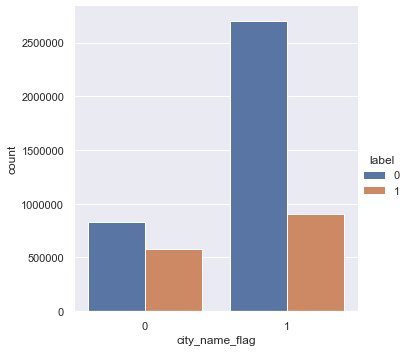

In [72]:
sns.catplot(x='city_name_flag', hue='label', data=train_voc, kind='count')

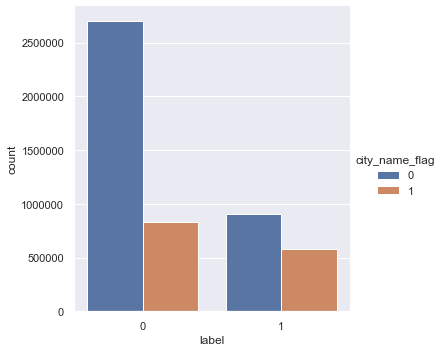

In [79]:
sns.catplot(x='label', hue='city_name_flag', data=train_voc, kind='count')

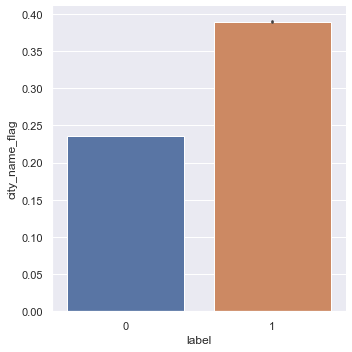

In [80]:
sns.catplot(x='label', y='city_name_flag', data=train_voc, kind='bar')

#### 显然 阳性号码异地打电话的比例会高些

In [65]:
train_voc['county_name_flag'].value_counts()  # 不好比较

0    5015430
Name: county_name_flag, dtype: int64

In [81]:
train_voc.sample(2)

,phone_no_m,opposite_no_m,calltype_id,start_datetime,call_dur,city_name,county_name,imei_m,city_name_src,county_name_src,label,city_name_flag,county_name_flag
2964635,fdf58b6d7adc4435e831d70c55a88709885ba410612eca...,b63368b66bca5cd4147a00383bca8e96ba64120dde1488...,1,2019-11-23 16:21:14,12,成都,温江区,4da929bd1ccb2447a92f48f146f9c1174e4e3a7cade765...,成都,温江分公司,0,0,1
2466311,06266c9ba70f0d9453f5580bee7b1e8b4343d8027a87e0...,e708d64a261269e0d3e3fcc2408352d354c66ea65f8136...,1,2019-10-28 10:13:08,88,成都,金牛区,835942b9b0bffc4eb5deefe95961a4a2ae6c21feee6ca3...,成都,新都分公司,1,0,1


### 群打电话

In [86]:
dfg = train_voc.groupby('phone_no_m month_id start_datetime'.split())['opposite_no_m'].count()

In [87]:
dfg = dfg.reset_index()

In [88]:
dfg = pd.merge(dfg, train_user[['phone_no_m', 'label']])

In [89]:
dfg.head(2)

,phone_no_m,month_id,start_datetime,opposite_no_m,label
0,00073ceecc0f7220a440580ac5dea410c90d14b6669458...,201908,2019-08-13 18:55:59,1,0
1,00073ceecc0f7220a440580ac5dea410c90d14b6669458...,201908,2019-08-13 19:05:49,1,0


In [92]:
pd.crosstab(dfg['opposite_no_m'], dfg['label'])

label,0,1
opposite_no_m,,
1,3443416,1445968
2,45450,17260
3,116,64
4,18,2
6,0,1


In [ ]:
群打电话 这个特征不显著

### time_interval

In [101]:
dfg = dfg.sort_values('phone_no_m month_id start_datetime'.split())

In [94]:
dfg["start_datetime_timestamp"] = dfg['start_datetime'].map(
    lambda t: int(t.timestamp()))

In [95]:
# 每次voc时间间隔
dfg['t'] = dfg['start_datetime_timestamp']# + dfg['call_dur']
dfg['t'] = dfg.groupby('phone_no_m month_id'.split())['t'].shift(1)
dfg['time_interval'] = dfg['start_datetime_timestamp'] - dfg['t']

In [97]:
dfg['time_interval_log'] = dfg.time_interval.map(lambda x: np.log(x+1))

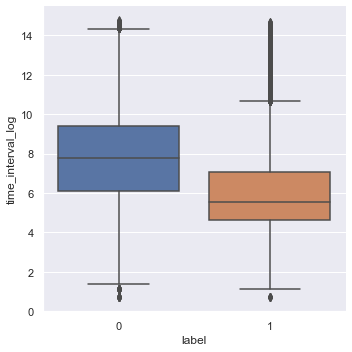

In [98]:
sns.catplot(x='label', y='time_interval_log', data=dfg, kind='box')

### call_dur

In [6]:
train_voc['call_dur_log'] = train_voc.call_dur.map(lambda x: np.log(x+1))

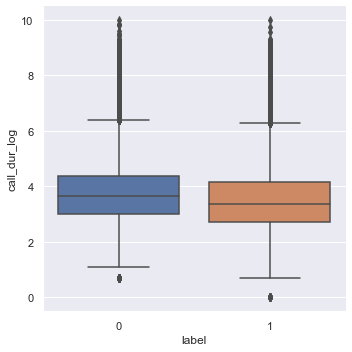

In [10]:
sns.catplot(x='label', y='call_dur_log', data=train_voc, kind='box')

In [ ]:
总体差不多，低值更低

### calltype_id

In [99]:
pd.crosstab(train_voc.calltype_id, train_voc.label)

label,0,1
calltype_id,,
1,1850530,1158403
2,1680028,320947
3,4178,1344


In [ ]:
阳性号码2的比例低很多

In [ ]:
feats = 'phone_no_m month_id'.split()
agg_func = {
        'city_name_flag': ['mean'],  # 异地打电话比例
        'call_dur': ['median','min'],
#         'calltype_id': ['nunique'],  
#         'city_name': ['nunique'],  
#         'county_name': ['nunique'],  
#         'imei_m': ['nunique'],  
#         'hour': ['nunique'],  
#         'day': ['nunique'],  
#         'weekday': ['nunique'],  
#         'time_interval': ['sum','mean','median','max','min','std'],
    }

feats = 'phone_no_m month_id calltype_id'.split()
agg_func = {
        'opposite_no_m': ['count'],  # 每种calltype_id的数量
    }

## train_sms

In [26]:
train_sms = pd.read_csv(os.path.join(args.DATA_DIR, 'train/train_sms.csv'))

train_sms.head()

,phone_no_m,opposite_no_m,calltype_id,request_datetime
0,0251387744988114430181c3e680a3733001a26fe686bd...,df22edbc0e3dd6bc4f2f453e687b743e8442a54834b64f...,2,2019-08-01 12:13:08
1,0251387744988114430181c3e680a3733001a26fe686bd...,df22edbc0e3dd6bc4f2f453e687b743e8442a54834b64f...,2,2019-08-01 12:13:08
2,0251387744988114430181c3e680a3733001a26fe686bd...,df22edbc0e3dd6bc4f2f453e687b743e8442a54834b64f...,2,2019-08-01 12:13:08
3,296cfae1d838070c4dd05a125a85c3d29bbb95f713c2ea...,1205bb229d750a6bcb3f9c33893b5d68c8fc8a6443b0a7...,2,2019-08-01 17:46:44
4,39de6ef3a87b8e660e42496450c54b731f3621ca708944...,972affd4be9e7596420379b7e7910843759cdfbd81315e...,2,2019-08-01 16:46:30


In [9]:
train_sms.shape

(6848509, 4)

In [11]:
describe(train_sms)

num of records: 6848509, num of columns: 4


,Data Type,Unique Values,count Missing,% Missing,Mode,Count Mode,% Mode,mean,std,min,25%,50%,75%,max
phone_no_m,object,6103,0,0.0,028b4b79b9eaf8f29e030d1d4e9f2ea64e40f3b0963ba2...,26050,0.380375,NaN,NaN,NaN,NaN,NaN,NaN,NaN
opposite_no_m,object,762106,0,0.0,df22edbc0e3dd6bc4f2f453e687b743e8442a54834b64f...,1698431,24.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
calltype_id,int64,2,0,0.0,2,6223623,90.8756,1.90876,0.287956,1,2,2,2,2
request_datetime,object,3647759,0,0.0,2020-03-18 17:56:43,133,0.00194203,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
len(set(train_sms.phone_no_m).intersection(set(train_user.phone_no_m)))

6103

In [28]:
train_sms = pd.merge(train_sms, train_user[['phone_no_m', 'label']])

In [27]:
train_sms['request_datetime'] = pd.to_datetime(train_sms['request_datetime'])

train_sms["hour"] = train_sms['request_datetime'].dt.hour
train_sms["day"] = train_sms['request_datetime'].dt.day
train_sms["weekday"] = train_sms['request_datetime'].dt.weekday
train_sms["month_id"] = train_sms['request_datetime'].dt.year.map(
    str)+train_sms['request_datetime'].dt.month.map(lambda x: f'0{x}' if x < 10 else str(x))

# 发短信的间隔时间
train_sms = train_sms.sort_values('phone_no_m request_datetime'.split())

train_sms['t'] = train_sms.groupby('phone_no_m month_id'.split())[
    'request_datetime'].shift(1)

train_sms['time_interval'] = (train_sms.request_datetime-train_sms.t).dt.total_seconds()

In [29]:
train_sms.label.value_counts()

0    5100463
1    1748046
Name: label, dtype: int64

### calltype_id
总之 阳性的calltype_id=1的比例会明显大

可以看到，阳性比大概是0.5
* 诈骗电话的calltype_id=1的数量明显高很多，而calltype_id=2的数量明显少(正常应该在200w以上)

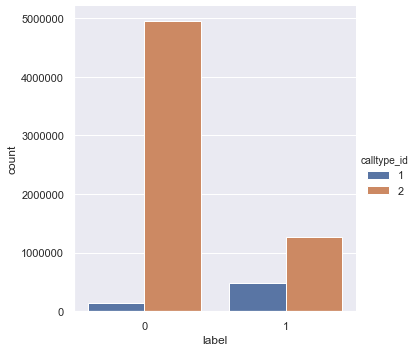

In [56]:
sns.catplot(x='label', hue='calltype_id', kind="count", data=_df)

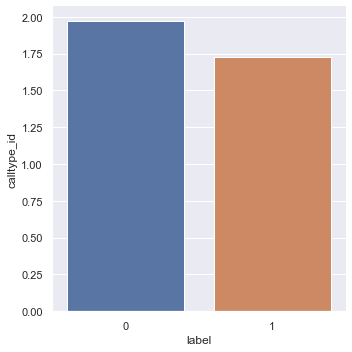

In [68]:
sns.catplot(x='label', y='calltype_id', kind="bar", data=_df)

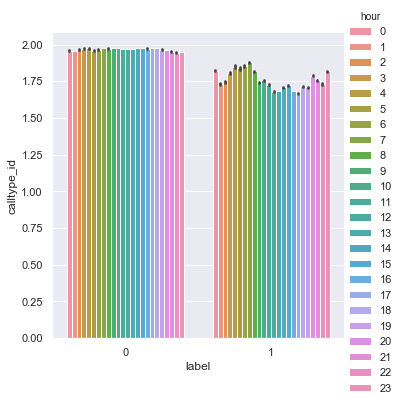

In [69]:
# hour=1 2 9-19 这段时间 calltype_id=1的比例会比较大
sns.catplot(x='label', y='calltype_id', kind="bar", hue='hour', data=_df)

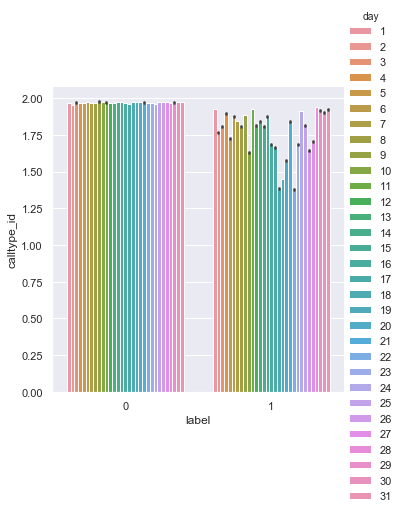

In [70]:
sns.catplot(x='label', y='calltype_id', kind="bar", hue='day', data=_df)

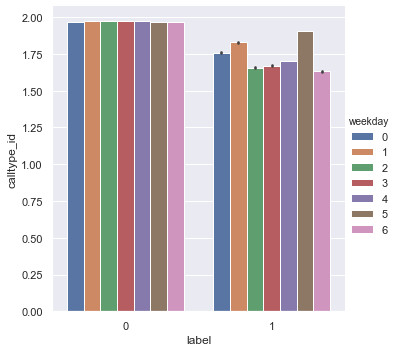

In [71]:
# weekday=2 3 4 6时 1的比例比较大
sns.catplot(x='label', y='calltype_id', kind="bar", hue='weekday', data=_df)

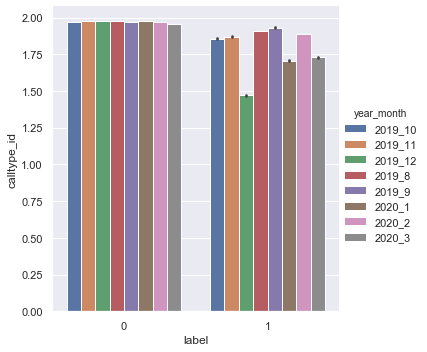

In [72]:
sns.catplot(x='label', y='calltype_id', kind="bar", hue='year_month', data=_df)

### request_datetime_interval

In [31]:
train_sms.time_interval.describe()

count    6.810923e+06
mean     1.262086e+04
std      3.946561e+04
min      0.000000e+00
25%      0.000000e+00
50%      2.100000e+01
75%      6.241000e+03
max      2.560951e+06
Name: time_interval, dtype: float64

In [34]:
train_sms['time_interval_log'] = train_sms.time_interval.map(lambda x: np.log(x+1))

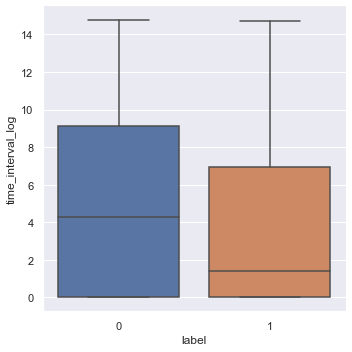

In [35]:
sns.catplot(x='label', y='time_interval_log', kind="box", data=train_sms)

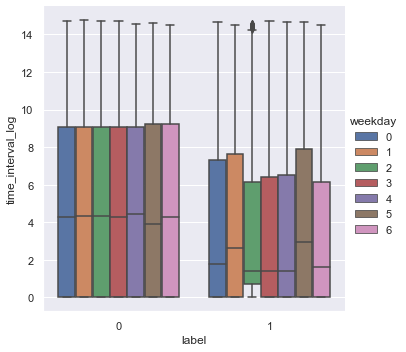

In [37]:
sns.catplot(x='label', y='time_interval_log', hue='weekday', kind="box", data=train_sms)

### 群发短信

In [40]:
dfg = train_sms.groupby('phone_no_m request_datetime'.split())['opposite_no_m'].count()

In [41]:
dfg.describe()

count    4.469915e+06
mean     1.532134e+00
std      9.731644e-01
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      1.320000e+02
Name: opposite_no_m, dtype: float64

In [43]:
dfg.reset_index().head()

,phone_no_m,request_datetime,opposite_no_m
0,00073ceecc0f7220a440580ac5dea410c90d14b6669458...,2019-08-12 08:09:11,3
1,00073ceecc0f7220a440580ac5dea410c90d14b6669458...,2019-08-13 16:21:53,5
2,00073ceecc0f7220a440580ac5dea410c90d14b6669458...,2019-08-13 18:56:02,3
3,00073ceecc0f7220a440580ac5dea410c90d14b6669458...,2019-08-14 08:08:18,3
4,00073ceecc0f7220a440580ac5dea410c90d14b6669458...,2019-08-15 08:10:23,3


In [44]:
dfg = pd.merge(dfg.reset_index(), train_user[['phone_no_m', 'label']])

In [50]:
dfg.opposite_no_m.describe()

count    4.469915e+06
mean     1.532134e+00
std      9.731644e-01
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      1.320000e+02
Name: opposite_no_m, dtype: float64

In [48]:
dfg['sms_cnt'] = dfg.opposite_no_m.map(np.log)

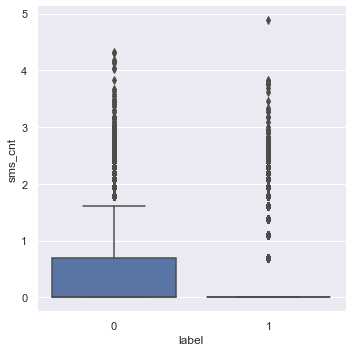

In [49]:
sns.catplot(x='label', y='sms_cnt', data=dfg, kind='box')

## train_app

In [77]:
train_app = pd.read_csv(os.path.join(args.DATA_DIR, 'train/train_app.csv'))

train_app.head()

,phone_no_m,busi_name,flow,month_id
0,416cec0f25b93f08bfd9cff44382c5da3a6346beb16a2c...,NaN,0.000000,NaN
1,26fcb7c6f4125ee5445756d4ff5346c29f2aff7d0f2e31...,NaN,0.000000,NaN
2,1a58c82eeefdb00ea6abf2e6010a8e808b27e1802b764d...,NaN,0.021529,2019-12
3,1a58c82eeefdb00ea6abf2e6010a8e808b27e1802b764d...,微信,0.001846,2019-12
4,1a58c82eeefdb00ea6abf2e6010a8e808b27e1802b764d...,高德导航,0.002288,2019-12


In [80]:
describe(train_app)

num of records: 3283602, num of columns: 4


,Data Type,Unique Values,count Missing,% Missing,Mode,Count Mode,% Mode,mean,std,min,25%,50%,75%,max
phone_no_m,object,6106,0,0.00,4c509ce3fdf2d9c772f0817a49b1172db188acfe084fd1...,3337,0.101626,NaN,NaN,NaN,NaN,NaN,NaN,NaN
busi_name,object,4994,381835,11.63,微信,38131,1.16126,NaN,NaN,NaN,NaN,NaN,NaN,NaN
flow,float64,1619236,0,0.00,0.000228882,2072,0.0631014,58.73,644.051,0,0.0192394,0.18122,2.68914,69464.5
month_id,object,8,812,0.02,2020-01,436439,13.2915,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [76]:
train_app.month_id.unique()

array([nan, '2019-12', '2019-11', '2019-08', '2019-09', '2019-10',
       '2020-01', '2020-02', '2020-03'], dtype=object)

In [11]:
train_app.shape

(3283602, 4)

## test_user

In [7]:
test_user = pd.read_csv(os.path.join(args.DATA_DIR, 'test/test_user.csv'))

test_user.head()

,phone_no_m,city_name,county_name,idcard_cnt,arpu_202004
0,22d522340df77e2252c1a4d92b4bcb00d515e36f3ec6bf...,成都,金牛分公司,1,9.0
1,5220d4b8429bdba3971a7b46a088c6b8fa6710f4060759...,天府新区,天府直属部门,1,NaN
2,7d19dd2b50ced56f03d23bf928cf34dc570a48525571a8...,成都,锦江分公司,1,9.0
3,134a4a591185c9d3788021896dcfc235e9e0a6a1e3f8a4...,绵阳,江油分公司,1,138.7
4,2356dcd6759d50455ddaeed03c838843558e9182d5962f...,成都,青羊分公司,2,39.0


In [15]:
describe(test_user)

num of records: 2045, num of columns: 5


,Data Type,Unique Values,count Missing,% Missing,Mode,Count Mode,% Mode,mean,std,min,25%,50%,75%,max
phone_no_m,object,2045,0,0.0,000f0f3100d815774e51f504a43e636dee84449da1c2c4...,1,0.0488998,NaN,NaN,NaN,NaN,NaN,NaN,NaN
city_name,object,22,67,3.3,成都,807,39.4621,NaN,NaN,NaN,NaN,NaN,NaN,NaN
county_name,object,152,67,3.3,成都直属部门,120,5.86797,NaN,NaN,NaN,NaN,NaN,NaN,NaN
idcard_cnt,int64,8,0,0.0,1,990,48.4108,1.93447,1.18974,0,1,2,2,7
arpu_202004,float64,1198,176,8.6,1,97,4.74328,69.0202,148.696,-61.84,13.8,34.6,80.87,4192.22


In [17]:
set(test_user.phone_no_m).intersection(set(train_user.phone_no_m))

set()

In [39]:
set(test_user.phone_no_m).intersection(set(train_voc.phone_no_m))

set()

In [5]:
set(test_user.city_name)-set(train_user.city_name)

set()

In [6]:
set(test_user.county_name)-set(train_user.county_name)

{'乐山直属部门', '布拖县分公司', '成都政企客户部', '眉山新区分公司'}

## test_voc

In [8]:
test_voc = pd.read_csv(os.path.join(args.DATA_DIR, 'test/test_voc.csv'))

test_voc.head()

,phone_no_m,opposite_no_m,calltype_id,start_datetime,call_dur,city_name,county_name,imei_m
0,b3dce36871f3e88164b18d4953b114163f008cb51c28fe...,f87f526ee776ac8b6b28392620fbb6049af9eaadab7de2...,1,2020-04-13 21:04:10,1909,NaN,NaN,685a0bfcd91b4ecec2ff35d656a35a4e4f9e1c7a92b15f...
1,b3dce36871f3e88164b18d4953b114163f008cb51c28fe...,f87f526ee776ac8b6b28392620fbb6049af9eaadab7de2...,1,2020-04-13 18:32:50,2510,NaN,NaN,685a0bfcd91b4ecec2ff35d656a35a4e4f9e1c7a92b15f...
2,b3dce36871f3e88164b18d4953b114163f008cb51c28fe...,f87f526ee776ac8b6b28392620fbb6049af9eaadab7de2...,1,2020-04-13 19:55:12,25,NaN,NaN,685a0bfcd91b4ecec2ff35d656a35a4e4f9e1c7a92b15f...
3,7ec68a368fbbec3279a6a34847f7959623dbff4638351a...,ed8280e5590e40e35a2af7d8708a0754540b0612600d52...,1,2020-04-20 14:11:44,276,NaN,NaN,a60e82a4383faa79ea972adc48686a729f689b7d1923bc...
4,7ec68a368fbbec3279a6a34847f7959623dbff4638351a...,ba792e76c3e7ee47d2403083f6def313372ae450ddf0b9...,2,2020-04-20 12:56:33,539,NaN,NaN,a60e82a4383faa79ea972adc48686a729f689b7d1923bc...


In [101]:
describe(test_voc)

num of records: 276522, num of columns: 8


,Data Type,Unique Values,count Missing,% Missing,Mode,Count Mode,% Mode,mean,std,min,25%,50%,75%,max
phone_no_m,object,1965,0,0.0,7cafb8975e6fad5aaa420785ae20de088e4f3bcae9f13e...,3514,1.27078,NaN,NaN,NaN,NaN,NaN,NaN,NaN
opposite_no_m,object,107683,0,0.0,df22edbc0e3dd6bc4f2f453e687b743e8442a54834b64f...,900,0.325471,NaN,NaN,NaN,NaN,NaN,NaN,NaN
calltype_id,int64,3,0,0.0,1,179311,64.8451,1.35275,0.480324,1,1,1,2,3
start_datetime,object,253144,0,0.0,2020-04-08 10:08:31,5,0.00180817,NaN,NaN,NaN,NaN,NaN,NaN,NaN
call_dur,int64,2089,0,0.0,10,5569,2.01394,91.4442,195.912,0,18,38,86,13287
city_name,object,21,60109,21.7,成都,113591,41.0785,NaN,NaN,NaN,NaN,NaN,NaN,NaN
county_name,object,172,60109,21.7,金牛区,12814,4.63399,NaN,NaN,NaN,NaN,NaN,NaN,NaN
imei_m,object,2656,0,0.0,407abcef186c8f8d369276990d69ccfc3b88cb51203ac5...,3864,1.39736,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## test_sms

In [9]:
test_sms = pd.read_csv(os.path.join(args.DATA_DIR, 'test/test_sms.csv'))

test_sms.head()

,phone_no_m,opposite_no_m,calltype_id,request_datetime
0,ce0dfda7499c30385ad400360a96476b2bbb16484e308f...,18f2150b69516bbf52f6593aed24b01333936f64cd3f8f...,2,2020-04-01 20:13:01
1,ce0dfda7499c30385ad400360a96476b2bbb16484e308f...,df22edbc0e3dd6bc4f2f453e687b743e8442a54834b64f...,2,2020-04-01 13:51:50
2,ce0dfda7499c30385ad400360a96476b2bbb16484e308f...,df22edbc0e3dd6bc4f2f453e687b743e8442a54834b64f...,2,2020-04-01 13:51:50
3,ce0dfda7499c30385ad400360a96476b2bbb16484e308f...,df22edbc0e3dd6bc4f2f453e687b743e8442a54834b64f...,2,2020-04-01 13:51:50
4,ce0dfda7499c30385ad400360a96476b2bbb16484e308f...,18f2150b69516bbf52f6593aed24b01333936f64cd3f8f...,2,2020-04-01 20:03:34


In [43]:
describe(test_sms)

num of records: 408900, num of columns: 4


,Data Type,Unique Values,count Missing,% Missing,Mode,Count Mode,% Mode,mean,std,min,25%,50%,75%,max
phone_no_m,object,2008,0,0.0,5246bdcae52f1d21e42e732b043ce05af4879f97586c0c...,34436,8.42162,NaN,NaN,NaN,NaN,NaN,NaN,NaN
opposite_no_m,object,96779,0,0.0,df22edbc0e3dd6bc4f2f453e687b743e8442a54834b64f...,99694,24.381,NaN,NaN,NaN,NaN,NaN,NaN,NaN
calltype_id,int64,2,0,0.0,2,312655,76.4625,1.76462,0.424234,1,2,2,2,2
request_datetime,object,262492,0,0.0,2020-04-05 12:57:36,26,0.00635852,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
len(set(test_sms.phone_no_m).intersection(set(test_user.phone_no_m)))

2008

## test_app

In [78]:
test_app = pd.read_csv(os.path.join(args.DATA_DIR, 'test/test_app.csv'))

test_app.head()

,phone_no_m,busi_name,flow,month_id
0,2abe25ed833883fcb81fb9f987596af936a7ef922c8d1d...,NaN,72.853565,2020-04
1,2abe25ed833883fcb81fb9f987596af936a7ef922c8d1d...,QQ,34.665351,2020-04
2,2abe25ed833883fcb81fb9f987596af936a7ef922c8d1d...,旺信,1.575969,2020-04
3,2abe25ed833883fcb81fb9f987596af936a7ef922c8d1d...,微信,664.393780,2020-04
4,2abe25ed833883fcb81fb9f987596af936a7ef922c8d1d...,钉钉,0.025555,2020-04


In [79]:
describe(test_app)

num of records: 129453, num of columns: 4


,Data Type,Unique Values,count Missing,% Missing,Mode,Count Mode,% Mode,mean,std,min,25%,50%,75%,max
phone_no_m,object,2045,0,0.00,71bf6ce94f4051e8e2461d7c1051585b7725ed3bd4e413...,447,0.345299,NaN,NaN,NaN,NaN,NaN,NaN,NaN
busi_name,object,2464,5349,4.13,DNS,2072,1.60058,NaN,NaN,NaN,NaN,NaN,NaN,NaN
flow,float64,109079,0,0.00,0,574,0.443404,59.5584,666.948,0,0.0229874,0.214077,3.14417,47939.7
month_id,object,1,574,0.44,2020-04,128879,99.5566,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [136]:
test_app.shape

(129453, 4)

In [139]:
len(set(test_app.phone_no_m).intersection(set(test_user.phone_no_m)))

2045

In [140]:
len(set(test_app.busi_name).intersection(set(train_app.busi_name)))

2416

In [142]:
# test_app中有49个app没在train_app中出现过
len(set(test_app.busi_name)-set(train_app.busi_name))

49

In [143]:
list(set(test_app.busi_name)-set(train_app.busi_name))

['Shuiguobang',
 'Wav',
 'Cbhb',
 'Bahamut',
 'Vlive',
 '声远论坛',
 '巴巴熊',
 '4455qq',
 '顺丰优选',
 'Xingyunba',
 '20Xs',
 '易查',
 '91Mgame',
 '穿衣助手',
 '杭州褪墨科技有限公司的社区在线网站',
 'GoldenHoYeahSlots_Game',
 'Lithium',
 '超好玩',
 'Archive',
 'Opentable',
 'upsight移动广告',
 'GeLaiYun',
 '长江证券门户网',
 'Custhelp',
 'Contentful',
 'Grab8',
 'Weverse_Browsing',
 '返还网',
 'Zazzle',
 'Acast',
 'TOM邮箱',
 '中国作家网',
 'Cuebiq',
 '青阳网',
 '人人贷WE理财',
 '福克斯体育',
 '书轩网',
 '万能页',
 '宅男女神',
 'Gamesofa',
 '朗玛移动',
 '政企通讯录',
 'Hotels',
 '新一代迅捷',
 '机务在线',
 'Orbot',
 '米折',
 'MailRuAgent',
 '大连银行官网']

# get_user_feat

In [55]:
train_users = pd.DataFrame()
for i in '1908 1909 1910 1911 1912 2001 2002 2003'.split():
    tmp = train_user[['phone_no_m', 'city_name', 'county_name', 'idcard_cnt', f'arpu_20{i}', 'label']].copy()
    tmp.columns = ['phone_no_m', 'city_name', 'county_name', 'idcard_cnt', f'arpu', 'label']
    tmp['month_id'] = f'20{i}'
    train_users = train_users.append(tmp)

In [56]:
train_users.head(2)

,phone_no_m,city_name,county_name,idcard_cnt,arpu,label,month_id
0,672ddbf02a5544d32e4ecc9433b1981bffe23bf912273a...,绵阳,江油分公司,1,46.06,0,201908
1,5e1272273e041e82cb275ae877710be98cdaf5b0a8f34d...,德阳,旌阳分公司,1,79.00,0,201908


In [14]:
# train_user['arpu_mean'] = train_user.iloc[:, 4:12].mean(axis=1)
# train_user['arpu_median'] = train_user.iloc[:, 4:12].median(axis=1)
# train_user['arpu_max'] = train_user.iloc[:, 4:12].max(axis=1)
# train_user['arpu_min'] = train_user.iloc[:, 4:12].min(axis=1)

In [12]:
# train_user['arpu'] = train_user.iloc[:, 4:12].mean(axis=1)

## target encoding

In [8]:
# city_name_series = train_user.groupby('city_name')['label'].mean()

# train_user['city_name'] = train_user['city_name'].map(city_name_series, na_action='ignore')

# county_name_series = train_user.groupby('county_name')['label'].mean()

# train_user['county_name'] = train_user['county_name'].map(county_name_series, na_action='ignore')

# test_user['city_name'] = test_user['city_name'].map(city_name_series, na_action='ignore')
# test_user['county_name'] = test_user['county_name'].map(county_name_series, na_action='ignore')

In [100]:
train_users[['phone_no_m', 'city_name', 'county_name', 'idcard_cnt',
       'arpu', 'month_id', 'label']].to_pickle(os.path.join(args.DATA_DIR,'data_gen/train_user_feat1.pkl'))

In [20]:
# test_user['arpu_mean'] = test_user.arpu_202004
# test_user['arpu_median'] = test_user.arpu_202004
# test_user['arpu_max'] = test_user.arpu_202004
# test_user['arpu_min'] = test_user.arpu_202004

In [98]:
test_user['arpu'] = test_user.arpu_202004

In [101]:
test_user['month_id'] = '202004'

In [102]:
test_user[['phone_no_m', 'city_name', 'county_name', 'idcard_cnt',
       'arpu', 'month_id']].to_pickle(os.path.join(args.DATA_DIR,'data_gen/test_user_feat1.pkl'))

# get_voc_feat

In [105]:
train_voc.head()

,phone_no_m,opposite_no_m,calltype_id,start_datetime,call_dur,city_name,county_name,imei_m,start_datetime_timestamp,hour,day,weekday,month_id,call_dur_q
0,3b6bef554a4754fa9977b50d99e6777c9fb26e585961a4...,3572f19c52faeea5111ddd79dfc3643171d00e6d8b3fd9...,2,2019-10-17 17:16:25,13,NaN,NaN,d2940d7cde5092d809af2e4bb8f6936a405382bd541542...,1571332585,17,17,3,201910,"(10.0, 15.0]"
1,3b6bef554a4754fa9977b50d99e6777c9fb26e585961a4...,3572f19c52faeea5111ddd79dfc3643171d00e6d8b3fd9...,2,2019-10-17 17:36:20,16,NaN,NaN,d2940d7cde5092d809af2e4bb8f6936a405382bd541542...,1571333780,17,17,3,201910,"(15.0, 20.0]"
2,ecd1b3f5a38576ef9872d1cb7a762f31869153de736e7a...,c386d11d5203136e924e070afcac734cdaea6691472e84...,1,2019-08-28 09:46:50,18,NaN,NaN,071e8dcb4010c643c48339cb8abf4a69e03b37afade98d...,1566985610,9,28,2,201908,"(15.0, 20.0]"
3,41a97bdfe77f3210deba78689baecb110922878be2f14c...,79ef199a532bcb9a89990d0996cee3d40557f06b9e5265...,1,2019-09-18 16:19:20,34,NaN,NaN,5f054945a5037e688abe0ef36d88a0fd351d476e3320c2...,1568823560,16,18,2,201909,"(26.0, 34.0]"
4,41a97bdfe77f3210deba78689baecb110922878be2f14c...,e273542129cf7fa37c28d3f4c95b7b9e8bcb561bbabc50...,2,2019-09-18 16:18:46,23,NaN,NaN,5f054945a5037e688abe0ef36d88a0fd351d476e3320c2...,1568823526,16,18,2,201909,"(20.0, 26.0]"


In [104]:
# train_voc['call_dur_q'] = pd.qcut(train_voc.call_dur, 10)

# train_voc['call_dur_q'].unique()

# t = train_voc['call_dur_q']

# dt = dict(zip(t.unique(), range(10)))

# dt

# test_voc['call_dur_q'] = pd.cut(test_voc.call_dur, [-0.001, 10, 15, 20, 26, 34, 45, 61, 89, 162, 21598])

# train_voc['call_dur_q'] = train_voc['call_dur_q'].map(dt)
# test_voc['call_dur_q'] = test_voc['call_dur_q'].map(dt)

# test_voc['call_dur_q'].value_counts()

In [18]:
#export
def aggregate_features(df_, feat, agg_func_dict, prefix=''):
    """
    """
    from loguru import logger
    df = df_.copy()
    logger.info(f'gen 特征 for {",".join(feat)}...')
    

    agg_df = df.groupby(feat).agg(agg_func_dict)
#     print(agg_df.columns.values)
    agg_df.columns = [prefix + '_'.join(col).strip() for col in agg_df.columns.values]
    logger.info(f'gen 特征 for {",".join(feat)}...end')
    
    return agg_df

In [132]:
def get_voc_feat(df):
    tmp = train_user[['phone_no_m', 'city_name', 'county_name', 'label']].copy()
    tmp.columns = ['phone_no_m', 'city_name_src', 'county_name_src', 'label']

    df = pd.merge(df, tmp)
    df['city_name_flag'] = 1 - (df.city_name==df.city_name_src).map(int, na_action='ignore')
    df["start_datetime"] = pd.to_datetime(df['start_datetime'] )

    df["start_datetime_timestamp"] = df['start_datetime'].map(lambda t: int(t.timestamp()))

    df["hour"] = df['start_datetime'].dt.hour
    df["day"] = df['start_datetime'].dt.day
    df["weekday"] = df['start_datetime'].dt.weekday
    df["month_id"] = df['start_datetime'].dt.year.map(str)+df['start_datetime'].dt.month.map(lambda x: f'0{x}' if x<10 else str(x))

    df = df.sort_values('phone_no_m start_datetime_timestamp'.split())
    # 每次voc时间间隔
    df['t'] = df['start_datetime_timestamp']# + df['call_dur']
    df['t'] = df.groupby('phone_no_m month_id'.split())['t'].shift(1)
    df['time_interval'] = df['start_datetime_timestamp'] - df['t']
    # 统计特征
    # 一阶统计特征
    agg_func = {
        'opposite_no_m': ['count','nunique'],  # 通话次数、有过通话的人数
        'city_name': ['nunique'],  
        'county_name': ['nunique'],  
        'city_name_flag': ['mean'],  
        'imei_m': ['nunique'],  
        'call_dur': ['median','min'],
        'time_interval': ['median'],
    }
    dfg = aggregate_features(df, 'phone_no_m month_id'.split(), agg_func)
    # 一阶统计特征衍生
    dfg['opposite_no_m_count_nunique_ratio'] = dfg.opposite_no_m_count/dfg.opposite_no_m_nunique
    
    
    # 2阶统计特征calltype_id
    agg_func = {
        'opposite_no_m': ['count','nunique'],  # 有过通话的人数
    }
    dfg2 = aggregate_features(df, ['phone_no_m', 'month_id', 'calltype_id'], agg_func)
    
    dfg2 = dfg2.unstack()

    dfg2.columns = [f'{i[0]}_calltype_id{i[1]}' for i in dfg2.columns]

    dfg2 = dfg2.fillna(0)
    # 2阶统计特征衍生
    dfg2['opposite_no_m_count_calltype_id1_2_ratio'] = dfg2['opposite_no_m_count_calltype_id1']/(dfg2['opposite_no_m_count_calltype_id2']+0.1)

    dfg2['opposite_no_m_count_calltype_id1_3_ratio'] = dfg2['opposite_no_m_count_calltype_id1']/(dfg2['opposite_no_m_count_calltype_id3']+0.1)
    dfg2['opposite_no_m_count_calltype_id2_3_ratio'] = dfg2['opposite_no_m_count_calltype_id2']/(dfg2['opposite_no_m_count_calltype_id3']+0.1)


    # 2阶统计特征hour

    agg_func = {
        'opposite_no_m': ['count','nunique'],  # 有过通话的人数
        'call_dur': ['sum','mean','median','max','min','std'],
        'time_interval': ['sum','mean','median','max','min','std'],
    }
    dfg_hour2 = aggregate_features(df, ['phone_no_m', 'month_id', 'hour'], agg_func)

    dfg_hour2 = dfg_hour2.unstack()

    dfg_hour2.columns = [f'{i[0]}_hour{i[1]}' for i in dfg_hour2.columns]

    dfg_hour2 = dfg_hour2.fillna(0)
    # 2阶统计特征weekday

    agg_func = {
        'opposite_no_m': ['count','nunique'],  # 有过通话的人数
        'calltype_id': ['nunique'],  
        'city_name': ['nunique'],  
        'county_name': ['nunique'],  
        'imei_m': ['nunique'],  
        'hour': ['nunique'],  
        'day': ['nunique'],  
        'call_dur': ['sum','mean','median','max','min','std'],
        'time_interval': ['sum','mean','median','max','min','std'],
    }
    dfg_weekday2 = aggregate_features(df, ['phone_no_m', 'month_id', 'weekday'], agg_func)
    dfg_weekday2 = dfg_weekday2.unstack()

    dfg_weekday2.columns = [f'{i[0]}_weekday{i[1]}' for i in dfg_weekday2.columns]

    dfg_weekday2 = dfg_weekday2.fillna(0)
    # merge
    df_voc_feats = pd.merge(pd.merge(pd.merge(pd.merge(dfg, dfg2, left_index=True, right_index=True),
            dfg22, left_index=True, right_index=True),
            dfg_hour2, left_index=True, right_index=True),
            dfg_weekday2, left_index=True, right_index=True)
    
#     df_voc_feats = df_voc_feats.reset_index()
#     del df_voc_feats['month_id']
#     df_voc_feats = df_voc_feats.groupby('phone_no_m').max().reset_index()
    
    return df_voc_feats

In [133]:
df_train_voc = get_voc_feat(train_voc)

2020-07-03 13:15:26.119 | INFO     | __main__:aggregate_features:7 - gen 特征 for phone_no_m,month_id...
2020-07-03 13:15:42.354 | INFO     | __main__:aggregate_features:13 - gen 特征 for phone_no_m,month_id...end
2020-07-03 13:15:43.036 | INFO     | __main__:aggregate_features:7 - gen 特征 for phone_no_m,month_id,call_dur_q...
2020-07-03 13:17:16.509 | INFO     | __main__:aggregate_features:13 - gen 特征 for phone_no_m,month_id,call_dur_q...end
2020-07-03 13:17:17.657 | INFO     | __main__:aggregate_features:7 - gen 特征 for phone_no_m,month_id,calltype_id...
2020-07-03 13:17:34.388 | INFO     | __main__:aggregate_features:13 - gen 特征 for phone_no_m,month_id,calltype_id...end
2020-07-03 13:17:35.268 | INFO     | __main__:aggregate_features:7 - gen 特征 for phone_no_m,month_id,hour...
2020-07-03 13:17:53.009 | INFO     | __main__:aggregate_features:13 - gen 特征 for phone_no_m,month_id,hour...end
2020-07-03 13:17:54.756 | INFO     | __main__:aggregate_features:7 - gen 特征 for phone_no_m,month_id,week

In [121]:
df_train_voc.head()

opposite_no_m_count  opposite_no_m_nunique  calltype_id_nunique  city_name_nunique  county_name_nunique  imei_m_nunique  hour_nunique  day_nunique  weekday_nunique  call_dur_sum  call_dur_mean  call_dur_median  call_dur_max  call_dur_min  call_dur_std  time_interval_sum  time_interval_mean  time_interval_median  time_interval_max  time_interval_min  time_interval_std  opposite_no_m_count_nunique_ratio  opposite_no_m_count_calltype_id1  opposite_no_m_count_calltype_id2  opposite_no_m_count_calltype_id3  opposite_no_m_nunique_calltype_id1  opposite_no_m_nunique_calltype_id2  opposite_no_m_nunique_calltype_id3  city_name_nunique_calltype_id1  city_name_nunique_calltype_id2  city_name_nunique_calltype_id3  county_name_nunique_calltype_id1  county_name_nunique_calltype_id2  county_name_nunique_calltype_id3  imei_m_nunique_calltype_id1  imei_m_nunique_calltype_id2  imei_m_nunique_calltype_id3  hour_nunique_calltype_id1  hour_nunique_calltype_id2  hour_nunique_calltype_id3  day_nunique_calltype_id1  day_nunique_calltype_id2  day_nunique_calltype_id3  weekday_nunique_calltype_id1  weekday_nunique_calltype_id2  weekday_nunique_calltype_id3  call_dur_sum_calltype_id1  call_dur_sum_calltype_id2  call_dur_sum_calltype_id3  call_dur_mean_calltype_id1  ...  call_dur_min_weekday6  call_dur_std_weekday0  call_dur_std_weekday1  call_dur_std_weekday2  call_dur_std_weekday3  call_dur_std_weekday4  call_dur_std_weekday5  call_dur_std_weekday6  time_interval_sum_weekday0  time_interval_sum_weekday1  time_interval_sum_weekday2  time_interval_sum_weekday3  time_interval_sum_weekday4  time_interval_sum_weekday5  time_interval_sum_weekday6  time_interval_mean_weekday0  time_interval_mean_weekday1  time_interval_mean_weekday2  time_interval_mean_weekday3  time_interval_mean_weekday4  time_interval_mean_weekday5  time_interval_mean_weekday6  time_interval_median_weekday0  time_interval_median_weekday1  time_interval_median_weekday2  time_interval_median_weekday3  time_interval_median_weekday4  time_interval_median_weekday5  time_interval_median_weekday6  time_interval_max_weekday0  time_interval_max_weekday1  time_interval_max_weekday2  time_interval_max_weekday3  time_interval_max_weekday4  time_interval_max_weekday5  time_interval_max_weekday6  time_interval_min_weekday0  time_interval_min_weekday1  time_interval_min_weekday2  time_interval_min_weekday3  time_interval_min_weekday4  time_interval_min_weekday5  time_interval_min_weekday6  time_interval_std_weekday0  time_interval_std_weekday1  time_interval_std_weekday2  time_interval_std_weekday3  time_interval_std_weekday4  time_interval_std_weekday5  time_interval_std_weekday6
phone_no_m                                         month_id                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             ...                          

In [134]:
df_train_voc.columns[:100]

Index(['opposite_no_m_count', 'opposite_no_m_nunique', 'calltype_id_nunique',
       'city_name_nunique', 'county_name_nunique', 'imei_m_nunique',
       'hour_nunique', 'day_nunique', 'weekday_nunique', 'call_dur_sum',
       'call_dur_mean', 'call_dur_median', 'call_dur_max', 'call_dur_min',
       'call_dur_std', 'time_interval_sum', 'time_interval_mean',
       'time_interval_median', 'time_interval_max', 'time_interval_min',
       'time_interval_std', 'opposite_no_m_count_nunique_ratio',
       'opposite_no_m_count_calltype_id1', 'opposite_no_m_count_calltype_id2',
       'opposite_no_m_count_calltype_id3',
       'opposite_no_m_nunique_calltype_id1',
       'opposite_no_m_nunique_calltype_id2',
       'opposite_no_m_nunique_calltype_id3', 'city_name_nunique_calltype_id1',
       'city_name_nunique_calltype_id2', 'city_name_nunique_calltype_id3',
       'county_name_nunique_calltype_id1', 'county_name_nunique_calltype_id2',
       'county_name_nunique_calltype_id3', 'imei_m_nuniq

In [135]:
df_train_voc.to_pickle(os.path.join(args.DATA_DIR, 'data_gen/df_train_voc2.pkl'))

In [11]:
# df_train = pd.read_pickle(os.path.join(args.DATA_DIR, 'data_gen/df_train_voc.pkl'))

In [136]:
df_test = get_voc_feat(test_voc)

2020-07-03 13:18:17.555 | INFO     | __main__:aggregate_features:7 - gen 特征 for phone_no_m,month_id...
2020-07-03 13:18:18.239 | INFO     | __main__:aggregate_features:13 - gen 特征 for phone_no_m,month_id...end
2020-07-03 13:18:18.267 | INFO     | __main__:aggregate_features:7 - gen 特征 for phone_no_m,month_id,call_dur_q...
2020-07-03 13:18:21.987 | INFO     | __main__:aggregate_features:13 - gen 特征 for phone_no_m,month_id,call_dur_q...end
2020-07-03 13:18:22.038 | INFO     | __main__:aggregate_features:7 - gen 特征 for phone_no_m,month_id,calltype_id...
2020-07-03 13:18:22.700 | INFO     | __main__:aggregate_features:13 - gen 特征 for phone_no_m,month_id,calltype_id...end
2020-07-03 13:18:22.754 | INFO     | __main__:aggregate_features:7 - gen 特征 for phone_no_m,month_id,hour...
2020-07-03 13:18:23.471 | INFO     | __main__:aggregate_features:13 - gen 特征 for phone_no_m,month_id,hour...end
2020-07-03 13:18:23.555 | INFO     | __main__:aggregate_features:7 - gen 特征 for phone_no_m,month_id,week

In [125]:
df_test.head(2)

,,opposite_no_m_count,opposite_no_m_nunique,calltype_id_nunique,city_name_nunique,county_name_nunique,imei_m_nunique,hour_nunique,day_nunique,weekday_nunique,call_dur_sum,call_dur_mean,call_dur_median,call_dur_max,call_dur_min,call_dur_std,time_interval_sum,time_interval_mean,time_interval_median,time_interval_max,time_interval_min,time_interval_std,opposite_no_m_count_nunique_ratio,opposite_no_m_count_calltype_id1,opposite_no_m_count_calltype_id2,opposite_no_m_count_calltype_id3,opposite_no_m_nunique_calltype_id1,opposite_no_m_nunique_calltype_id2,opposite_no_m_nunique_calltype_id3,city_name_nunique_calltype_id1,city_name_nunique_calltype_id2,city_name_nunique_calltype_id3,county_name_nunique_calltype_id1,county_name_nunique_calltype_id2,county_name_nunique_calltype_id3,imei_m_nunique_calltype_id1,imei_m_nunique_calltype_id2,imei_m_nunique_calltype_id3,hour_nunique_calltype_id1,hour_nunique_calltype_id2,hour_nunique_calltype_id3,day_nunique_calltype_id1,day_nunique_calltype_id2,day_nunique_calltype_id3,weekday_nunique_calltype_id1,weekday_nunique_calltype_id2,weekday_nunique_calltype_id3,call_dur_sum_calltype_id1,call_dur_sum_calltype_id2,call_dur_sum_calltype_id3,call_dur_mean_calltype_id1,...,call_dur_min_weekday6,call_dur_std_weekday0,call_dur_std_weekday1,call_dur_std_weekday2,call_dur_std_weekday3,call_dur_std_weekday4,call_dur_std_weekday5,call_dur_std_weekday6,time_interval_sum_weekday0,time_interval_sum_weekday1,time_interval_sum_weekday2,time_interval_sum_weekday3,time_interval_sum_weekday4,time_interval_sum_weekday5,time_interval_sum_weekday6,time_interval_mean_weekday0,time_interval_mean_weekday1,time_interval_mean_weekday2,time_interval_mean_weekday3,time_interval_mean_weekday4,time_interval_mean_weekday5,time_interval_mean_weekday6,time_interval_median_weekday0,time_interval_median_weekday1,time_interval_median_weekday2,time_interval_median_weekday3,time_interval_median_weekday4,time_interval_median_weekday5,time_interval_median_weekday6,time_interval_max_weekday0,time_interval_max_weekday1,time_interval_max_weekday2,time_interval_max_weekday3,time_interval_max_weekday4,time_interval_max_weekday5,time_interval_max_weekday6,time_interval_min_weekday0,time_interval_min_weekday1,time_interval_min_weekday2,time_interval_min_weekday3,time_interval_min_weekday4,time_interval_min_weekday5,time_interval_min_weekday6,time_interval_std_weekday0,time_interval_std_weekday1,time_interval_std_weekday2,time_interval_std_weekday3,time_interval_std_weekday4,time_interval_std_weekday5,time_interval_std_weekday6
phone_no_m,month_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
000f0f3100d815774e51f504a43e636dee84449da1c2c455e82682188bcc024ca5298fa83a766d505a72036d5d0cf6a52e99239e1324da7b817af40760a51d4f,202004,159,77,2,3,11,1,15,28,7,16709,105.088050,38.0,1589,4,207.900365,2537828.0,16062.202532,3928.0,243471.0,-43.0,29205.846789,2.064935,69.0,90.0,0.0,30.0,59.0,0.0,3.0,3.0,0.0,7.0,10.0,0.0,1.0,1.0,0.0,15.0,14.0,0.0,23.0,24.0,0.0,7.0,7.0,0.0,7270.0,9439.0,0.0,105.362319,...,4.0,340.045487,98.60368,56.347125,298.688595,131.353957,116.946513,160.614304,523005.0,328704.0,386426.0,444411.0,315062.0,282039.0,258181.0,24905.000000,21913.600000,15457.040000,13070.911765,15002.952381,15668.833333,10757.541667,3838.0,5136.0,6601.0,2777.5,3356.0,7500.0,1001.0,243471.0,84282.0,83358.0,85699.0,72761.0,74894.0,56188.0,33.0,-43.0,24.0,11.0,0.0,29.0,8.0,55506.966295,29369.600860,23336.706745,22215.423103,24553.704013,22076.529798,17877.654342
00281f7b748b9a009ab86a9da317856efdde8b1fc6438874277db90fbe857f7012a9f0099ac7c5bc69a4eda5689137820aac3cf4876034181f8bec52002b9561,202004,108,18,2,1,1,1,16,28,7,6996,64.777778,18.5,1280,1,179.781453,2501579.0,23379.242991,5245.0,163095.0,14.0,34038.833117,6.000000,34.0,74.0,0.0,9.0,16.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,12.0,16.0,0.0,13.0,25.0,0.0,7.0,7.0,0.0,1110.0,5886.0,0.0,32.647059,...,5.0,7.753136,349.32277,208.251729,73.893405,57.971641,111.80

In [137]:
df_test.to_pickle(os.path.join(args.DATA_DIR, 'data_gen/df_test_voc2.pkl'))

# get_sms_feats

## 原始特征衍生

In [68]:
def get_sms_feat(df):
    _df = df.copy()

    _df['request_datetime'] = pd.to_datetime(_df['request_datetime'])

    _df["hour"] = _df['request_datetime'].dt.hour
    _df["day"] = _df['request_datetime'].dt.day
    _df["weekday"] = _df['request_datetime'].dt.weekday
    _df["month_id"] = _df['request_datetime'].dt.year.map(str)+_df['request_datetime'].dt.month.map(lambda x: f'0{x}' if x<10 else str(x))

    # 发短信的间隔时间
    _df = _df.sort_values('phone_no_m request_datetime'.split())

    _df['t'] = _df.groupby('phone_no_m month_id'.split())['request_datetime'].shift(1)

    _df['time_interval'] = (_df.request_datetime-_df.t).dt.total_seconds()

    # 统计特征
    # 一阶统计特征
    agg_func = {
        'opposite_no_m': ['count','nunique'],  # 有过通话的人数
        'calltype_id': ['nunique'],  
        'hour': ['nunique'],  
        'day': ['nunique'],  
        'weekday': ['nunique'],  
        'time_interval': ['sum','mean','median','max','min','std'],
    }
    dfg = aggregate_features(_df, 'phone_no_m month_id'.split(), agg_func)
    # 一阶统计特征衍生
    dfg['opposite_no_m_count_nunique_ratio'] = dfg.opposite_no_m_count/dfg.opposite_no_m_nunique
    # 2阶统计特征calltype_id
    agg_func = {
        'opposite_no_m': ['count','nunique'],  # 有过通话的人数
        'hour': ['nunique'],  
        'day': ['nunique'],  
        'weekday': ['nunique'],  
        'time_interval': ['sum','mean','median','max','min','std'],
    }
    dfg2 = aggregate_features(_df, ['phone_no_m', 'month_id', 'calltype_id'], agg_func)
    
    dfg2 = dfg2.unstack()

    dfg2.columns = [f'{i[0]}_calltype_id{i[1]}' for i in dfg2.columns]

    dfg2 = dfg2.fillna(0)
    # 2阶统计特征衍生
    dfg2['opposite_no_m_count_calltype_id1_2_ratio'] = dfg2['opposite_no_m_count_calltype_id1']/(dfg2['opposite_no_m_count_calltype_id2']+0.1)



    dfg2['time_interval_std_calltype_id1_2_ratio'] = dfg2['time_interval_std_calltype_id1']/(dfg2['time_interval_std_calltype_id2']+0.1)

    # 2阶统计特征hour

    agg_func = {
        'opposite_no_m': ['count','nunique'],  # 有过通话的人数
        'calltype_id': ['nunique'],  
        'day': ['nunique'],  
        'weekday': ['nunique'],  
        'time_interval': ['sum','mean','median','max','min','std'],
    }
    dfg_hour2 = aggregate_features(_df, ['phone_no_m', 'month_id', 'hour'], agg_func)

    dfg_hour2 = dfg_hour2.unstack()

    dfg_hour2.columns = [f'{i[0]}_hour{i[1]}' for i in dfg_hour2.columns]

    dfg_hour2 = dfg_hour2.fillna(0)
    # 2阶统计特征weekday

    agg_func = {
        'opposite_no_m': ['count','nunique'],  # 有过通话的人数
        'calltype_id': ['nunique'],  
        'hour': ['nunique'],  
        'day': ['nunique'],  
        'time_interval': ['sum','mean','median','max','min','std'],
    }
    dfg_weekday2 = aggregate_features(_df, ['phone_no_m', 'month_id', 'weekday'], agg_func)
    dfg_weekday2 = dfg_weekday2.unstack()

    dfg_weekday2.columns = [f'{i[0]}_weekday{i[1]}' for i in dfg_weekday2.columns]

    dfg_weekday2 = dfg_weekday2.fillna(0)
    # merge
    df_sms_feats = pd.merge(pd.merge(pd.merge(dfg, dfg2, left_index=True, right_index=True),
            dfg_hour2, left_index=True, right_index=True),
            dfg_weekday2, left_index=True, right_index=True)
    
#     df_sms_feats = df_sms_feats.reset_index()
#     del df_sms_feats['month_id']
#     df_sms_feats = df_sms_feats.groupby('phone_no_m').max().reset_index()
    
    return df_sms_feats

In [69]:
df_train_sms = get_sms_feat(train_sms)

2020-07-03 11:27:47.653 | INFO     | __main__:aggregate_features:7 - gen 特征 for phone_no_m,month_id...
2020-07-03 11:28:07.616 | INFO     | __main__:aggregate_features:13 - gen 特征 for phone_no_m,month_id...end
2020-07-03 11:28:08.481 | INFO     | __main__:aggregate_features:7 - gen 特征 for phone_no_m,month_id,calltype_id...
2020-07-03 11:28:27.076 | INFO     | __main__:aggregate_features:13 - gen 特征 for phone_no_m,month_id,calltype_id...end
2020-07-03 11:28:28.084 | INFO     | __main__:aggregate_features:7 - gen 特征 for phone_no_m,month_id,hour...
2020-07-03 11:28:46.731 | INFO     | __main__:aggregate_features:13 - gen 特征 for phone_no_m,month_id,hour...end
2020-07-03 11:28:48.149 | INFO     | __main__:aggregate_features:7 - gen 特征 for phone_no_m,month_id,weekday...
2020-07-03 11:29:04.825 | INFO     | __main__:aggregate_features:13 - gen 特征 for phone_no_m,month_id,weekday...end


In [70]:
df_train_sms.head(2)

opposite_no_m_count  opposite_no_m_nunique  calltype_id_nunique  hour_nunique  day_nunique  weekday_nunique  time_interval_sum  time_interval_mean  time_interval_median  time_interval_max  time_interval_min  time_interval_std  opposite_no_m_count_nunique_ratio  opposite_no_m_count_calltype_id1  opposite_no_m_count_calltype_id2  opposite_no_m_nunique_calltype_id1  opposite_no_m_nunique_calltype_id2  hour_nunique_calltype_id1  hour_nunique_calltype_id2  day_nunique_calltype_id1  day_nunique_calltype_id2  weekday_nunique_calltype_id1  weekday_nunique_calltype_id2  time_interval_sum_calltype_id1  time_interval_sum_calltype_id2  time_interval_mean_calltype_id1  time_interval_mean_calltype_id2  time_interval_median_calltype_id1  time_interval_median_calltype_id2  time_interval_max_calltype_id1  time_interval_max_calltype_id2  time_interval_min_calltype_id1  time_interval_min_calltype_id2  time_interval_std_calltype_id1  time_interval_std_calltype_id2  opposite_no_m_count_calltype_id1_2_ratio  time_interval_std_calltype_id1_2_ratio  opposite_no_m_count_hour0  opposite_no_m_count_hour1  opposite_no_m_count_hour2  opposite_no_m_count_hour3  opposite_no_m_count_hour4  opposite_no_m_count_hour5  opposite_no_m_count_hour6  opposite_no_m_count_hour7  opposite_no_m_count_hour8  opposite_no_m_count_hour9  opposite_no_m_count_hour10  opposite_no_m_count_hour11  opposite_no_m_count_hour12  ...  hour_nunique_weekday6  day_nunique_weekday0  day_nunique_weekday1  day_nunique_weekday2  day_nunique_weekday3  day_nunique_weekday4  day_nunique_weekday5  day_nunique_weekday6  time_interval_sum_weekday0  time_interval_sum_weekday1  time_interval_sum_weekday2  time_interval_sum_weekday3  time_interval_sum_weekday4  time_interval_sum_weekday5  time_interval_sum_weekday6  time_interval_mean_weekday0  time_interval_mean_weekday1  time_interval_mean_weekday2  time_interval_mean_weekday3  time_interval_mean_weekday4  time_interval_mean_weekday5  time_interval_mean_weekday6  time_interval_median_weekday0  time_interval_median_weekday1  time_interval_median_weekday2  time_interval_median_weekday3  time_interval_median_weekday4  time_interval_median_weekday5  time_interval_median_weekday6  time_interval_max_weekday0  time_interval_max_weekday1  time_interval_max_weekday2  time_interval_max_weekday3  time_interval_max_weekday4  time_interval_max_weekday5  time_interval_max_weekday6  time_interval_min_weekday0  time_interval_min_weekday1  time_interval_min_weekday2  time_interval_min_weekday3  time_interval_min_weekday4  time_interval_min_weekday5  time_interval_min_weekday6  time_interval_std_weekday0  time_interval_std_weekday1  time_interval_std_weekday2  time_interval_std_weekday3  time_interval_std_weekday4  time_interval_std_weekday5  time_interval_std_weekday6
phone_no_m                                         month_id                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

In [71]:
df_train_sms.to_pickle(os.path.join(args.DATA_DIR, 'data_gen/df_train_sms1.pkl'))

In [72]:
df_test_sms = get_sms_feat(test_sms)

2020-07-03 11:30:35.132 | INFO     | __main__:aggregate_features:7 - gen 特征 for phone_no_m,month_id...
2020-07-03 11:30:35.757 | INFO     | __main__:aggregate_features:13 - gen 特征 for phone_no_m,month_id...end
2020-07-03 11:30:35.796 | INFO     | __main__:aggregate_features:7 - gen 特征 for phone_no_m,month_id,calltype_id...
2020-07-03 11:30:36.440 | INFO     | __main__:aggregate_features:13 - gen 特征 for phone_no_m,month_id,calltype_id...end
2020-07-03 11:30:36.492 | INFO     | __main__:aggregate_features:7 - gen 特征 for phone_no_m,month_id,hour...
2020-07-03 11:30:37.227 | INFO     | __main__:aggregate_features:13 - gen 特征 for phone_no_m,month_id,hour...end
2020-07-03 11:30:37.312 | INFO     | __main__:aggregate_features:7 - gen 特征 for phone_no_m,month_id,weekday...
2020-07-03 11:30:38.012 | INFO     | __main__:aggregate_features:13 - gen 特征 for phone_no_m,month_id,weekday...end


In [73]:
df_test_sms.head(2)

,,opposite_no_m_count,opposite_no_m_nunique,calltype_id_nunique,hour_nunique,day_nunique,weekday_nunique,time_interval_sum,time_interval_mean,time_interval_median,time_interval_max,time_interval_min,time_interval_std,opposite_no_m_count_nunique_ratio,opposite_no_m_count_calltype_id1,opposite_no_m_count_calltype_id2,opposite_no_m_nunique_calltype_id1,opposite_no_m_nunique_calltype_id2,hour_nunique_calltype_id1,hour_nunique_calltype_id2,day_nunique_calltype_id1,day_nunique_calltype_id2,weekday_nunique_calltype_id1,weekday_nunique_calltype_id2,time_interval_sum_calltype_id1,time_interval_sum_calltype_id2,time_interval_mean_calltype_id1,time_interval_mean_calltype_id2,time_interval_median_calltype_id1,time_interval_median_calltype_id2,time_interval_max_calltype_id1,time_interval_max_calltype_id2,time_interval_min_calltype_id1,time_interval_min_calltype_id2,time_interval_std_calltype_id1,time_interval_std_calltype_id2,opposite_no_m_count_calltype_id1_2_ratio,time_interval_std_calltype_id1_2_ratio,opposite_no_m_count_hour0,opposite_no_m_count_hour1,opposite_no_m_count_hour2,opposite_no_m_count_hour3,opposite_no_m_count_hour4,opposite_no_m_count_hour5,opposite_no_m_count_hour6,opposite_no_m_count_hour7,opposite_no_m_count_hour8,opposite_no_m_count_hour9,opposite_no_m_count_hour10,opposite_no_m_count_hour11,opposite_no_m_count_hour12,...,hour_nunique_weekday6,day_nunique_weekday0,day_nunique_weekday1,day_nunique_weekday2,day_nunique_weekday3,day_nunique_weekday4,day_nunique_weekday5,day_nunique_weekday6,time_interval_sum_weekday0,time_interval_sum_weekday1,time_interval_sum_weekday2,time_interval_sum_weekday3,time_interval_sum_weekday4,time_interval_sum_weekday5,time_interval_sum_weekday6,time_interval_mean_weekday0,time_interval_mean_weekday1,time_interval_mean_weekday2,time_interval_mean_weekday3,time_interval_mean_weekday4,time_interval_mean_weekday5,time_interval_mean_weekday6,time_interval_median_weekday0,time_interval_median_weekday1,time_interval_median_weekday2,time_interval_median_weekday3,time_interval_median_weekday4,time_interval_median_weekday5,time_interval_median_weekday6,time_interval_max_weekday0,time_interval_max_weekday1,time_interval_max_weekday2,time_interval_max_weekday3,time_interval_max_weekday4,time_interval_max_weekday5,time_interval_max_weekday6,time_interval_min_weekday0,time_interval_min_weekday1,time_interval_min_weekday2,time_interval_min_weekday3,time_interval_min_weekday4,time_interval_min_weekday5,time_interval_min_weekday6,time_interval_std_weekday0,time_interval_std_weekday1,time_interval_std_weekday2,time_interval_std_weekday3,time_interval_std_weekday4,time_interval_std_weekday5,time_interval_std_weekday6
phone_no_m,month_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
000f0f3100d815774e51f504a43e636dee84449da1c2c455e82682188bcc024ca5298fa83a766d505a72036d5d0cf6a52e99239e1324da7b817af40760a51d4f,202004,235,107,2,18,29,7,2542049.0,10863.457265,1167.5,141228.0,0.0,20988.411906,2.196262,6.0,229.0,4.0,103.0,3.0,18.0,4.0,29.0,3.0,7.0,91641.0,2450408.0,15273.5,10747.403509,11826.0,1029.0,40554.0,141228.0,4.0,0.0,16245.520081,21114.360721,0.026189,0.769403,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,9.0,22.0,36.0,20.0,17.0,...,8.0,4.0,3.0,5.0,5.0,4.0,4.0,4.0,378664.0,264559.0,471354.0,422001.0,370227.0,311756.0,323488.0,7282.0,8818.633333,13093.166667,15071.464286,8814.928571,11546.518519,17025.684211,1376.5,687.5,2243.0,4029.0,17.5,3257.0,4212.0,62532.0,74666.0,141228.0,87250.0,74699.0,51566.0,88574.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15798.879402,18885.184754,27200.994042,22519.128834,20042.769937,16675.968950,27789.473981
001285c54745996ac4705eca7713d73de7921edf4133a6f6e5ef994133b5e544f1422012042fca641fb86e35b999e842ff5fd36f8c43b23d5108cbea40365391,202004,63,17,1,12,11,7,1330843.0,21465.209677,0.0,183527.0,0.0,48730.011401,3.705882,0.0,63.0,0.0,17.0,0.0,12.0,0.0,11.0,0.0,7.0,0.0,1330843.0,0.0,21465.209677,0.0,0.0,0.0,183527.0,0.0,0.0,0.000000,48730.011401,0.000000

In [74]:
df_test_sms.to_pickle(os.path.join(args.DATA_DIR, 'data_gen/df_test_sms1.pkl'))

### calltype_id
总之 阳性的calltype_id=1的比例会明显大

可以看到，阳性比大概是0.5
* 诈骗电话的calltype_id=1的数量明显高很多，而calltype_id=2的数量明显少(正常应该在200w以上)

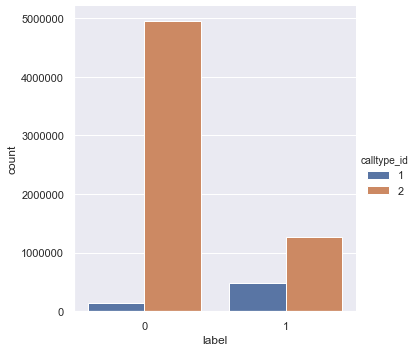

In [56]:
sns.catplot(x='label', hue='calltype_id', kind="count", data=_df)

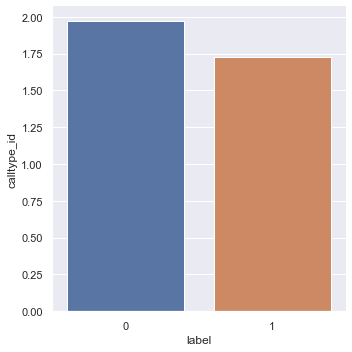

In [68]:
sns.catplot(x='label', y='calltype_id', kind="bar", data=_df)

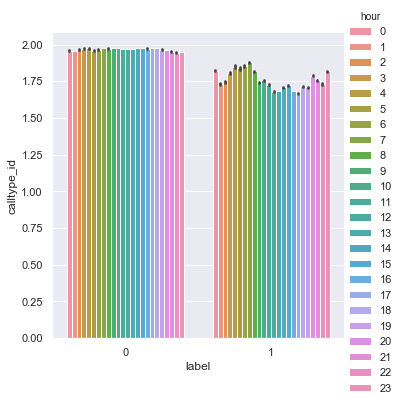

In [69]:
# hour=1 2 9-19 这段时间 calltype_id=1的比例会比较大
sns.catplot(x='label', y='calltype_id', kind="bar", hue='hour', data=_df)

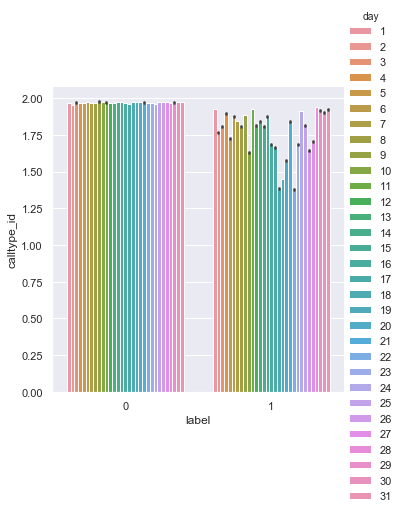

In [70]:
sns.catplot(x='label', y='calltype_id', kind="bar", hue='day', data=_df)

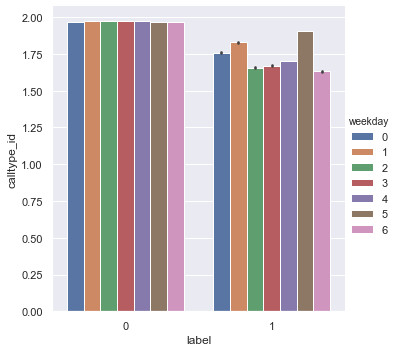

In [71]:
# weekday=2 3 4 6时 1的比例比较大
sns.catplot(x='label', y='calltype_id', kind="bar", hue='weekday', data=_df)

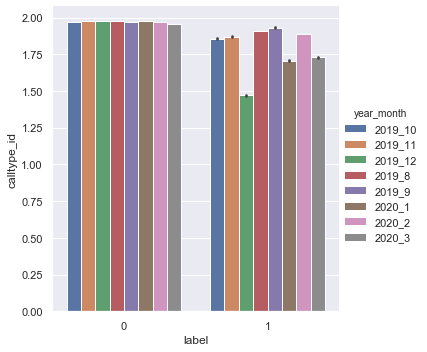

In [72]:
sns.catplot(x='label', y='calltype_id', kind="bar", hue='year_month', data=_df)

### request_datetime_interval

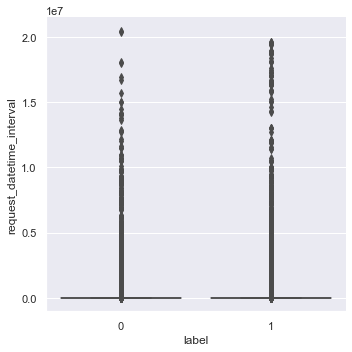

In [128]:
sns.catplot(x='label', y='request_datetime_interval', kind="box", data=_df)

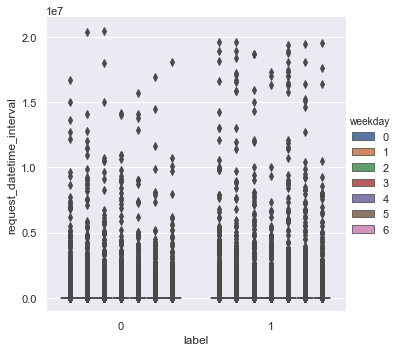

In [129]:
sns.catplot(x='label', y='request_datetime_interval', hue='weekday', kind="box", data=_df)

## 一阶特征opposite_no_m
可以基本上区分两类诈骗方式，一类靠电话诈骗的 基本不发短信；另一类靠短信诈骗的，发的短信会多

nunique值会偏好

In [8]:
#export
def aggregate_features(df_, feat, agg_func_dict, prefix=''):
    """
    """
    from loguru import logger
    df = df_.copy()
    logger.info(f'gen 特征 for {",".join(feat)}...')
    

    agg_df = df.groupby(feat).agg(agg_func_dict)
#     print(agg_df.columns.values)
    agg_df.columns = [prefix + '_'.join(col).strip() for col in agg_df.columns.values]
    logger.info(f'gen 特征 for {",".join(feat)}...end')
    
    return agg_df

In [73]:
_df.head(2)

,phone_no_m,opposite_no_m,calltype_id,request_datetime,label,hour,day,weekday,year_month
0,0251387744988114430181c3e680a3733001a26fe686bd...,df22edbc0e3dd6bc4f2f453e687b743e8442a54834b64f...,2,2019-08-01 12:13:08,1,12,1,3,2019_8
1,0251387744988114430181c3e680a3733001a26fe686bd...,df22edbc0e3dd6bc4f2f453e687b743e8442a54834b64f...,2,2019-08-01 12:13:08,1,12,1,3,2019_8


In [75]:
# 一阶统计特征
agg_func = {
    'opposite_no_m': ['count','nunique'],  # 有过sms的人数
}
dfg = aggregate_features(_df, ['phone_no_m'], agg_func)
# 一阶统计特征衍生
# 和每个发短信人的平均sms次数
dfg['opposite_no_m_count_nunique_ratio'] = dfg.opposite_no_m_count/dfg.opposite_no_m_nunique

2020-06-25 10:50:44.161 | INFO     | __main__:aggregate_features:7 - gen 特征 for phone_no_m...
2020-06-25 10:50:55.368 | INFO     | __main__:aggregate_features:13 - gen 特征 for phone_no_m...end


In [79]:
dfg = pd.merge(dfg, train_user['phone_no_m label'.split()], left_index=True, right_on='phone_no_m')

In [89]:
dfg = dfg.set_index('phone_no_m')

In [90]:
dfg.shape

(6103, 4)

In [98]:
dfg.head()

,opposite_no_m_count,opposite_no_m_nunique,opposite_no_m_count_nunique_ratio,label
phone_no_m,,,,
00073ceecc0f7220a440580ac5dea410c90d14b666945839292d187d300bca49f991e0ee9f1c477b28d30b8f656a4421d236a19d67a78e17d25bd0935763076a,497,61,8.147541,0
00086f1d2e2c1227f811c3e17f2e9c37cf9971f47bb933bfa515404062315e50e19902c0bcaa98411be0f060800eb5af1b061c53893349f5204486936121cbcd,551,34,16.205882,1
000c00db8809c27e723ba90582bf334b2d3ca9063f53fbcc24a0d5a76deb43a3696e0de84f9824c3f69762718f050f1391e30c7eeb6af558c306c8a326299a9e,97,31,3.129032,1
0014b698069503ceadb9442605834729064be51cdd7002477d83916e0b0af2150a1c86a7e9bb6efb01f53d518214cc2558ddaa46a910f1cfa0fbbdd1aef818c1,67,14,4.785714,1
0034030646f2008d36431e00b133db30efc8b0c31757f3ed0ce29c9ae2994d640edccb3321672120201fc54506d5fe8d34195605b65ef52adf672cc99b7f9dc4,1383,237,5.835443,0


In [103]:
dfg['label'] = dfg['label'].map({0: '0_', 1: '1_'})

In [104]:
dfg.dtypes

opposite_no_m_count                    int64
opposite_no_m_nunique                  int64
opposite_no_m_count_nunique_ratio    float64
label                                 object
dtype: object

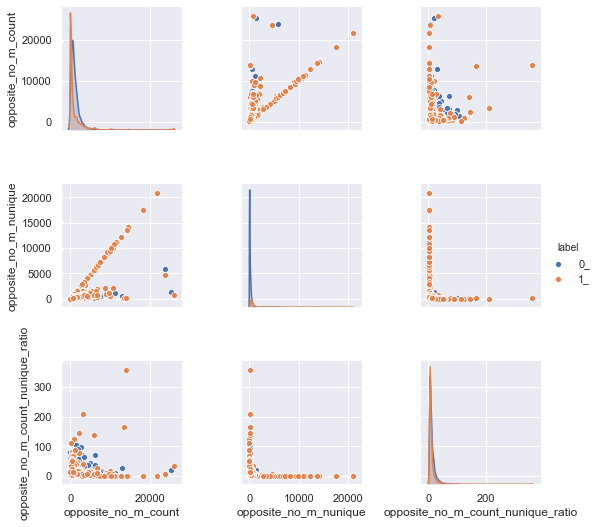

In [105]:
sns.pairplot(dfg, hue='label')

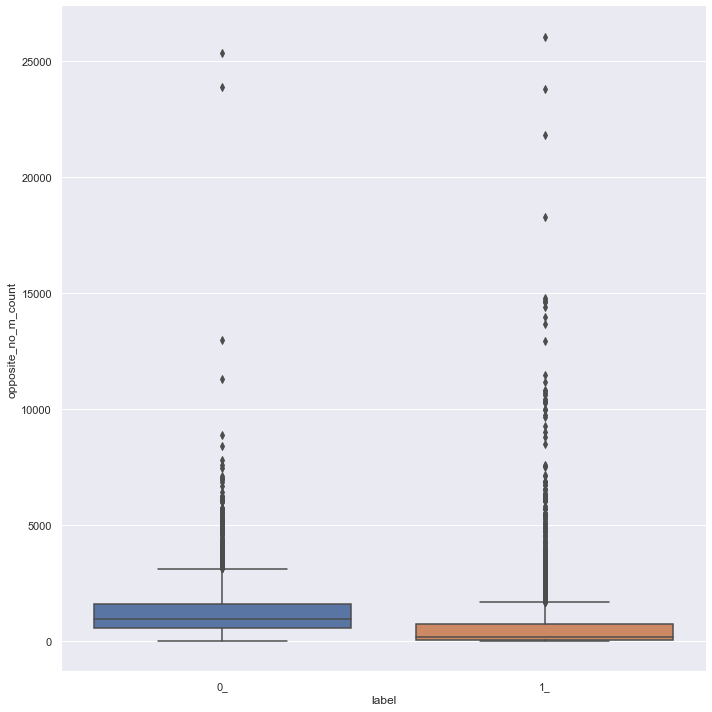

In [109]:
# 阳性的发短信次数
sns.catplot(x='label', y='opposite_no_m_count', kind="box", data=dfg, height=10)

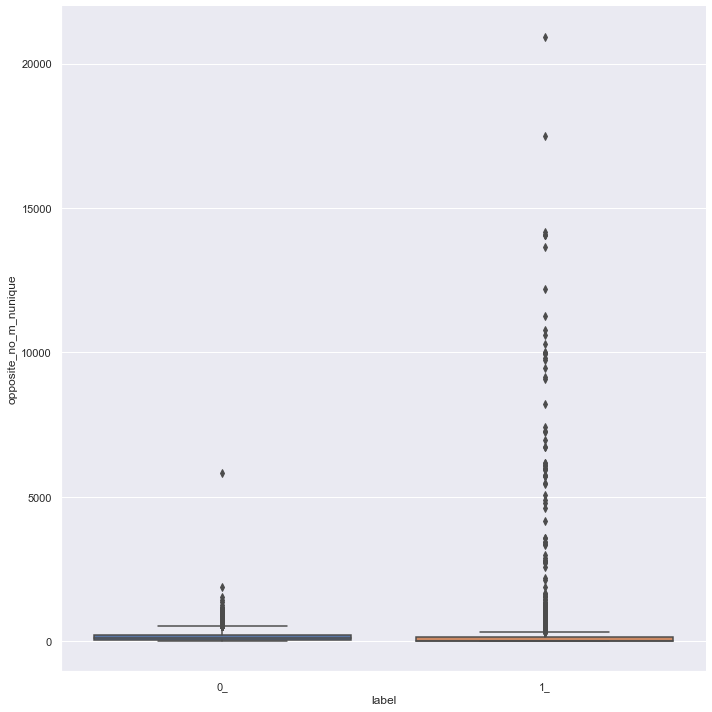

In [111]:
sns.catplot(x='label', y='opposite_no_m_nunique', kind="box", height=10,data=dfg)

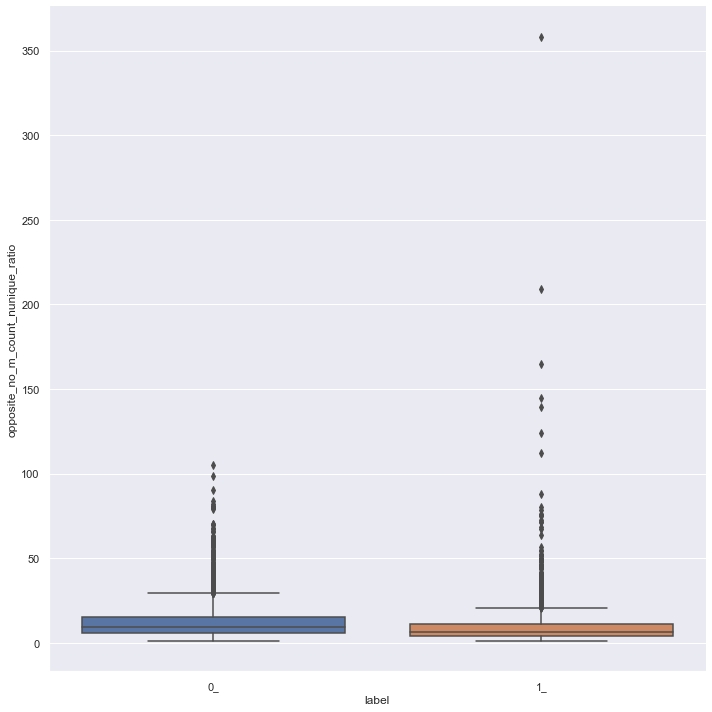

In [112]:
sns.catplot(x='label', y='opposite_no_m_count_nunique_ratio', kind="box", height=10, data=dfg)

## 二阶特征phone_no_m calltype_id

In [114]:
_df.head(1)

,phone_no_m,opposite_no_m,calltype_id,request_datetime,label,hour,day,weekday,year_month
0,0251387744988114430181c3e680a3733001a26fe686bd...,df22edbc0e3dd6bc4f2f453e687b743e8442a54834b64f...,2,2019-08-01 12:13:08,1,12,1,3,2019_8


In [116]:
agg_func = {
    'opposite_no_m': ['count','nunique'],  # 有过sms的人数
    'hour': ['nunique'],  
    'day': ['nunique'],  
    'weekday': ['nunique'],  
    'year_month': ['nunique'],  
}
dfg2 = aggregate_features(_df, 'phone_no_m calltype_id'.split(), agg_func)
# 一阶统计特征衍生
# 和每个发短信人的平均sms次数
dfg2['opposite_no_m_count_nunique_ratio'] = dfg2.opposite_no_m_count/dfg2.opposite_no_m_nunique

2020-06-25 11:34:05.774 | INFO     | __main__:aggregate_features:7 - gen 特征 for phone_no_m,calltype_id...
2020-06-25 11:34:23.464 | INFO     | __main__:aggregate_features:13 - gen 特征 for phone_no_m,calltype_id...end


In [117]:
dfg2.head()

opposite_no_m_count  opposite_no_m_nunique  hour_nunique  day_nunique  weekday_nunique  year_month_nunique  opposite_no_m_count_nunique_ratio
phone_no_m                                         calltype_id                                                                                                                                               
00073ceecc0f7220a440580ac5dea410c90d14b66694583... 1                              3                      2             2            2                2                   2                           1.500000
                                                   2                            494                     59            18           31                7                   8                           8.372881
00086f1d2e2c1227f811c3e17f2e9c37cf9971f47bb933b... 1                             10                      7             6            6                6                   4                           1.428571
                                                   2                            541                     28            14           31                7                   7                          19.321429
000c00db8809c27e723ba90582bf334b2d3ca9063f53fbc... 1                             16                     10             6            4                4                   1                           1.600000

# get_app_feats
诈骗的形式主要是电话和短信，相比较而言 app的内容不太重要 只能作为补充数据使用

数据以月的力度展现了用户用过哪些app，消耗了多少流量，

本来想着做app2vec的，但是以month的力度呈现数据，seq的感觉顿时没有了。。。  

不过感觉主办方还是按照顺序提供的，不然怎么会有同一个phone_no_m busi_name month_id多条数据的情况！so。。。

先做一个target encoding试试吧

In [81]:
# 因为train_app中month_id缺失很少，删掉
train_app = train_app[train_app.month_id.notnull()]

In [84]:
# test_app中month_id填充
test_app.loc[test_app.month_id.isnull(), 'month_id'] = '2020-04'

In [82]:
train_app.head(2)

,phone_no_m,busi_name,flow,month_id
2,1a58c82eeefdb00ea6abf2e6010a8e808b27e1802b764d...,NaN,0.021529,2019-12
3,1a58c82eeefdb00ea6abf2e6010a8e808b27e1802b764d...,微信,0.001846,2019-12


In [83]:
test_app.head(2)

,phone_no_m,busi_name,flow,month_id
0,2abe25ed833883fcb81fb9f987596af936a7ef922c8d1d...,NaN,72.853565,2020-04
1,2abe25ed833883fcb81fb9f987596af936a7ef922c8d1d...,QQ,34.665351,2020-04


In [70]:
# busi_name_te_series = tmp.groupby('busi_name')['label'].mean()

# train_app['busi_name_te'] = train_app['busi_name_te']

In [88]:
def get_app_feat(df):
    _df = df.copy()
    # 用众数填充
    _df.loc[_df.month_id.isnull(), 'busi_name'] = '<UNK>'
    
#     _df['busi_name_te'] = _df.busi_name.map(busi_name_te_series, na_action='ignore')
    _df['month_id'] = _df['month_id'].map(lambda x: x[:4]+x[-2:])

    # 统计特征
    # 一阶统计特征
    agg_func = {
        'busi_name': ['count','nunique'],  # 有过通话的人数
        'flow': ['sum','mean','median','max','min','std'],
#         'busi_name_te': ['sum','mean','median','max','min','std'],
    }
    dfg = aggregate_features(_df, 'phone_no_m month_id'.split(), agg_func)
    # 一阶统计特征衍生
    dfg['busi_name_count_nunique_ratio'] = dfg.busi_name_count/dfg.busi_name_nunique
    dfg['flow_sum_nunique_ratio'] = dfg.flow_sum/dfg.busi_name_nunique
    
    # merge
    df_app_feats = dfg
    
#     df_app_feats = df_app_feats.reset_index()
#     del df_app_feats['month_id']
#     df_app_feats = df_app_feats.groupby('phone_no_m').max().reset_index()
    
    return df_app_feats

In [89]:
df_train_app = get_app_feat(train_app)

2020-07-03 11:41:57.766 | INFO     | __main__:aggregate_features:7 - gen 特征 for phone_no_m,month_id...
2020-07-03 11:41:59.947 | INFO     | __main__:aggregate_features:13 - gen 特征 for phone_no_m,month_id...end


In [91]:
df_train_app.head()

busi_name_count  busi_name_nunique     flow_sum  flow_mean  flow_median     flow_max  flow_min    flow_std  busi_name_count_nunique_ratio  flow_sum_nunique_ratio
phone_no_m                                         month_id                                                                                                                                                                   
00073ceecc0f7220a440580ac5dea410c90d14b66694583... 201908                 62                 57  4189.107661  49.283620     0.089949  3163.689316  0.000164  348.520432                       1.087719               73.493117
                                                   201909                 63                 63  3127.770451  48.119545     0.070505  2964.370479  0.000352  367.551885                       1.000000               49.647150
                                                   201910                 15                 15     0.318534   0.019908     0.012991     0.086149  0.000145    0.023334                       1.000000                0.021236
                                                   201911                 13                 13    76.028239   5.068549     0.070173    61.185415  0.003056   15.669846                       1.000000                5.848326
                                                   202001                  2                  2     0.004360   0.002180     0.002180     0.003231  0.001129    0.001486                       1.000000                0.002180

In [92]:
df_train_app.shape

(30030, 10)

In [93]:
df_train_app.to_pickle(os.path.join(args.DATA_DIR, 'data_gen/df_train_app1.pkl'))

In [94]:
df_test_app = get_app_feat(test_app)

2020-07-03 11:42:30.143 | INFO     | __main__:aggregate_features:7 - gen 特征 for phone_no_m,month_id...
2020-07-03 11:42:30.238 | INFO     | __main__:aggregate_features:13 - gen 特征 for phone_no_m,month_id...end


In [95]:
df_test_app.head(2)

,,busi_name_count,busi_name_nunique,flow_sum,flow_mean,flow_median,flow_max,flow_min,flow_std,busi_name_count_nunique_ratio,flow_sum_nunique_ratio
phone_no_m,month_id,,,,,,,,,,
000f0f3100d815774e51f504a43e636dee84449da1c2c455e82682188bcc024ca5298fa83a766d505a72036d5d0cf6a52e99239e1324da7b817af40760a51d4f,202004,226,198,3105.527115,13.271483,0.117798,1122.193042,0.001053,81.463175,1.141414,15.68448
001285c54745996ac4705eca7713d73de7921edf4133a6f6e5ef994133b5e544f1422012042fca641fb86e35b999e842ff5fd36f8c43b23d5108cbea40365391,202004,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN


In [96]:
df_test_app.to_pickle(os.path.join(args.DATA_DIR, 'data_gen/df_test_app1.pkl'))

In [13]:
describe(train_app)

num of records: 3283602, num of columns: 4


,Data Type,Unique Values,count Missing,% Missing,Mode,Count Mode,% Mode,mean,std,min,25%,50%,75%,max
phone_no_m,object,6106,0,0.0,4c509ce3fdf2d9c772f0817a49b1172db188acfe084fd1...,3337,0.101626,NaN,NaN,NaN,NaN,NaN,NaN,NaN
busi_name,object,4994,381835,11.6,微信,38131,1.16126,NaN,NaN,NaN,NaN,NaN,NaN,NaN
flow,float64,1619236,0,0.0,0.000228882,2072,0.0631014,58.73,644.051,0,0.0192394,0.18122,2.68914,69464.5
month_id,object,8,812,0.0,2020-01,436439,13.2915,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [137]:
describe(test_app)

num of records: 129453, num of columns: 4


,Data Type,Unique Values,count Missing,% Missing,Mode,Count Mode,% Mode,mean,std,min,25%,50%,75%,max
phone_no_m,object,2045,0,0.0,71bf6ce94f4051e8e2461d7c1051585b7725ed3bd4e413...,447,0.345299,NaN,NaN,NaN,NaN,NaN,NaN,NaN
busi_name,object,2464,5349,4.1,DNS,2072,1.60058,NaN,NaN,NaN,NaN,NaN,NaN,NaN
flow,float64,109079,0,0.0,0,574,0.443404,59.5584,666.948,0,0.0229874,0.214077,3.14417,47939.7
month_id,object,1,574,0.4,2020-04,128879,99.5566,NaN,NaN,NaN,NaN,NaN,NaN,NaN


train_app里有接近11%的数据没有app name, test_app里也有这种情况

train_app有少量的monthid缺失，影响不大，test_app里虽然有缺失，但肯定是2020-04的喽·

In [134]:
len(set(train_app.phone_no_m).intersection(set(train_user.phone_no_m)))

6106

In [131]:
train_app.head(2)

,phone_no_m,busi_name,flow,month_id
0,416cec0f25b93f08bfd9cff44382c5da3a6346beb16a2c...,NaN,0.0,NaN
1,26fcb7c6f4125ee5445756d4ff5346c29f2aff7d0f2e31...,NaN,0.0,NaN


In [133]:
train_app.shape

(3283602, 4)

In [132]:
train_app.drop_duplicates('phone_no_m busi_name '.split()).shape

(852624, 4)

In [160]:
_df = train_app.copy()

In [161]:
# 用众数填充
_df.loc[_df.month_id.isnull(), 'month_id'] = '2020-01'

_df.loc[_df.month_id.isnull(), 'busi_name'] = '<UNK>'

In [157]:
# _df = _df.groupby('phone_no_m busi_name month_id'.split())['flow'].sum().reset_index()

In [163]:
_df.shape

(3283602, 4)

## 一阶特征opposite_no_m
* 使用的总流量
* app使用 nunique，count
* 衍生特征
    * 每个app平均使用流量 使用的总流量/nunique
    * 每个app平均使用次数 count/nunique

In [165]:
#export
def aggregate_features(df_, feat, agg_func_dict, prefix=''):
    """
    """
    from loguru import logger
    df = df_.copy()
    logger.info(f'gen 特征 for {",".join(feat)}...')
    

    agg_df = df.groupby(feat).agg(agg_func_dict)
#     print(agg_df.columns.values)
    agg_df.columns = [prefix + '_'.join(col).strip() for col in agg_df.columns.values]
    logger.info(f'gen 特征 for {",".join(feat)}...end')
    
    return agg_df

In [164]:
_df.head(2)

,phone_no_m,busi_name,flow,month_id
0,416cec0f25b93f08bfd9cff44382c5da3a6346beb16a2c...,NaN,0.0,2020-01
1,26fcb7c6f4125ee5445756d4ff5346c29f2aff7d0f2e31...,NaN,0.0,2020-01


In [166]:
# 一阶统计特征
agg_func = {
    'busi_name': ['count','nunique'],  # 
    'flow': ['sum','mean','median','max','min','std'],  # 
}
dfg = aggregate_features(_df, ['phone_no_m'], agg_func)

2020-06-27 11:15:52.193 | INFO     | __main__:aggregate_features:7 - gen 特征 for phone_no_m...
2020-06-27 11:15:53.742 | INFO     | __main__:aggregate_features:13 - gen 特征 for phone_no_m...end


In [167]:
dfg.head(2)

,busi_name_count,busi_name_nunique,flow_sum,flow_mean,flow_median,flow_max,flow_min,flow_std
phone_no_m,,,,,,,,
00073ceecc0f7220a440580ac5dea410c90d14b666945839292d187d300bca49f991e0ee9f1c477b28d30b8f656a4421d236a19d67a78e17d25bd0935763076a,214,95,7794.011783,31.427467,0.057317,3163.689316,0.000072,277.454489
00086f1d2e2c1227f811c3e17f2e9c37cf9971f47bb933bfa515404062315e50e19902c0bcaa98411be0f060800eb5af1b061c53893349f5204486936121cbcd,24,24,108.340788,4.166953,0.015107,102.223318,0.000220,20.025928


In [168]:
# 一阶统计特征衍生
# 平均每个app使用的流量
dfg['flow_sum_busi_name_nunique_ratio'] = dfg.flow_sum/dfg.busi_name_nunique
# 平均每个app使用的次数
dfg['busi_name_count_nunique_ratio'] = dfg.busi_name_count/dfg.busi_name_nunique

In [79]:
dfg = pd.merge(dfg, train_user['phone_no_m label'.split()], left_index=True, right_on='phone_no_m')

# train 

In [15]:
from sklearn.model_selection import KFold
folds = KFold(n_splits=5, shuffle=True, random_state=2020)

In [36]:
param = {
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': ['binary_logloss', 'accuracy'], 
    'num_leaves': 300,  
    'min_data_in_leaf': 500,  
    'learning_rate': 0.05,  
    'feature_fraction': 0.8,  
    'bagging_fraction': 0.8,  
    'bagging_freq': 5,  
    'lambda_l1': 0.4,  
    'lambda_l2': 0.5,  
    'min_gain_to_split': 0.2,  
    'verbose': -1,
    'num_threads':-1,
#     'scale_pos_weight':2,
}


In [37]:
import lightgbm as lgb

In [19]:
predictions = np.zeros([len(df_test)])
for fold_,(trn_idx,val_idx) in enumerate(folds.split(df_train)):
    X_train, y_train = df_train.drop(columns='label').iloc[trn_idx], df_train.label.iloc[trn_idx]
    X_val, y_val = df_train.drop(columns='label').iloc[val_idx], df_train.label.iloc[val_idx]
    
    trn_data = lgb.Dataset(X_train, y_train)
    val_data = lgb.Dataset(X_val, y_val)
    
    num_round = 1000
    # callback
    def reset_metrics():
        def callback(env):
            if env.iteration % 100 == 1:
                rs = pd.Series(env.model.predict(X_val).tolist()).map(round)
                print(f'{env.iteration} predict...{f1_score(y_val.tolist(), rs.tolist(), average="macro")}')
#                 print(f'{env.iteration} predict...{accuracy_score(y_val.values, rs.values)}')
        callback.before_iteration = False
        callback.order = 0
        return callback
    
    clf = lgb.train(param, 
                    trn_data, 
                    num_round, 
                    valid_sets = [trn_data, val_data], 
                    verbose_eval = 100, 
                    early_stopping_rounds = 200,
                    callbacks=[reset_metrics()])
    rs = pd.Series(clf.predict(X_val).tolist()).map(round)
    print(f'{num_round} predict...{f1_score(y_val.tolist(), rs.tolist(), average="macro")}')
    #oof[val_idx] = clf.predict(X_train[val_idx], num_iteration=clf.best_iteration)    
    predictions += clf.predict(df_test, num_iteration=clf.best_iteration) / folds.n_splits

Training until validation scores don't improve for 100 rounds
1 predict...0.4101811062163485
[100]	training's binary_logloss: 0.196805	valid_1's binary_logloss: 0.238405
101 predict...0.8945899142977742
[200]	training's binary_logloss: 0.158131	valid_1's binary_logloss: 0.232655
201 predict...0.9007303076396516
[300]	training's binary_logloss: 0.133154	valid_1's binary_logloss: 0.231995
301 predict...0.9056556120451681
[400]	training's binary_logloss: 0.113123	valid_1's binary_logloss: 0.234375
401 predict...0.9064264106096209
Early stopping, best iteration is:
[311]	training's binary_logloss: 0.130552	valid_1's binary_logloss: 0.230911
1000 predict...0.9065891472868217
Training until validation scores don't improve for 100 rounds
1 predict...0.40198511166253104
[100]	training's binary_logloss: 0.197193	valid_1's binary_logloss: 0.22992
101 predict...0.9088339878022291
[200]	training's binary_logloss: 0.15815	valid_1's binary_logloss: 0.219118
201 predict...0.919922913343966
[300]	trai

In [20]:
df_test.shape

(1965, 743)

In [21]:
predictions

array([0.10649238, 0.02958863, 0.02775703, ..., 0.01254436, 0.66470501,
       0.02023079])

In [22]:
df_test['label'] = pd.Series(predictions).map(round).tolist()

In [23]:
test_user = pd.merge(test_user, df_test[['label']], left_on='phone_no_m', right_index=True, how='left')

In [24]:
test_user['phone_no_m label'.split()].fillna(0).to_csv(os.path.join(args.DATA_DIR, 'data_gen/sub01.csv'), index=False)

In [26]:
test_user.label.value_counts(dropna=False)

0.0    1380
1.0     585
NaN      80
Name: label, dtype: int64